# Show me the market trends to help me decide. Which US real-estate market is doing best overall.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Show all rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
state_df = pd.read_csv('State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')

### Observing the Data and  getting ready for cleaning process

In [6]:
display(state_df.head())
display(state_df.tail())

RegionID  SizeRank    RegionName RegionType  StateName  2000-01-31  \
0         9         0    California      state        NaN   189941.08   
1        54         1         Texas      state        NaN   111027.32   
2        14         2       Florida      state        NaN   113269.22   
3        43         3      New York      state        NaN   138979.50   
4        47         4  Pennsylvania      state        NaN    99325.16   

   2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
0   190575.16   191424.47   193265.35   195397.24   197695.25   200129.56   
1   111084.90   111112.75   111257.30   111349.72   111452.90   111515.23   
2   113522.49   113824.72   114430.52   115078.63   115734.49   116395.00   
3   139444.66   139897.45   140878.33   141899.07   143006.42   143983.97   
4    99534.91    99734.58   100139.36   100552.79   100975.07   101422.83   

   2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  \
0   202680.81   205249.31   207687.47   210089.50   212436.83   214427.38   
1   111714.98   111980.13   112268.38   112599.69   112964.58   113177.10   
2   117066.97   117767.59   118489.51   119239.11   120008.49   120711.00   
3   144838.68   145587.19   146394.81   147382.91   148474.05   149513.47   
4   101852.81   102290.39   102709.71   103174.23   103656.69   104134.40   

   2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  \
0   216394.44   218604.65   221344.70   224091.38   226598.05   228953.57   
1   113137.20   112911.77   112780.00   112822.78   112956.55   113113.12   
2   121406.93   122127.30   122969.88   123883.44   124837.54   125857.68   
3   150356.26   151100.33   151885.51   152778.83   153781.23   154849.55   
4   104568.83   105002.94   105467.71   105911.99   106366.32   106854.19   

   2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  \
0   231229.05   233441.40   235518.81   237483.62   239329.76   240831.31   
1   113253.69   113399.74   113550.47   113660.11   113746.28   113776.85   
2   126936.31   128047.72   129162.31   130236.05   131291.83   132245.76   
3   155970.93   157073.58   158234.71   159452.51   160744.27   161997.66   
4   107391.62   107934.86   108434.89   108943.27   109424.54   109902.57   

   2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  2002-07-31  \
0   242351.25   244116.00   246480.12   249237.05   252299.38   255841.90   
1   113860.92   114077.54   114454.50   114898.74   115394.27   115897.32   
2   133123.87   133984.07   134950.09   136009.74   137118.14   138243.11   
3   163141.99   164121.85   165113.27   166169.72   167386.23   168693.54   
4   110376.51   110869.34   111411.42   112003.27   112656.32   113388.37   

   2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  2003-01-31  \
0   259668.69   263542.11   267230.03   270844.48   274407.93   277562.85   
1   116430.00   116899.92   117304.83   117646.59   117938.42   118158.27   
2   139443.64   140627.55   141816.31   142945.05   144159.44   145352.31   
3   170137.39   171620.31   173099.06   174554.81   176071.87   177544.79   
4   114215.19   115071.64   115910.94   116631.52   117316.39   117971.65   

   2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  2003-07-31  \
0   280499.56   283601.07   287202.35   291203.81   294921.53   298835.15   
1   118302.81   118461.91   118657.00   118882.79   119112.41   119337.60   
2   146578.89   147838.09   149237.32   150712.22   152185.17   153654.27   
3   178946.69   180399.05   181825.67   183280.15   184722.78   186226.66   
4   118630.58   119259.91   119926.03   120744.85   121736.24   122825.74   

   2003-08-31  2003-09-30  2003-10-31  2003-11-30  2003-12-31  2004-01-31  \
0   302960.80   307535.17   312007.59   316314.19   320471.10   324756.82   
1   119592.03   119822.21   120057.03   120225.57   120366.19   120718.01   
2   155172.53   156752.71   158363.15   159946.48   161473.18   162928.63   
3   187990.16  

RegionID  SizeRank            RegionName RegionType  StateName  \
46        37        47          North Dakota      state        NaN   
47         3        48                Alaska      state        NaN   
48        12        49  District of Columbia      state        NaN   
49        58        50               Vermont      state        NaN   
50        62        51               Wyoming      state        NaN   

    2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   135123.10   135355.34   135446.26   135622.00   135794.42   135919.03   
48   181591.41   181990.03   182670.91   184198.67   186029.98   188110.58   
49   114573.57   114746.98   115038.06   115608.88   116285.60   116914.07   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   136278.55   136501.32   136876.86   137085.56   137486.80   137996.49   
48   190028.77   191659.79   192791.90   192929.06   192979.39   193005.83   
49   117549.98   118203.21   118936.37   119808.40   120693.86   121571.81   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2001-01-31  2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   140889.98   145273.65   150848.24   154879.20   158164.00   160802.39   
48   193558.96   194187.91   195256.05   197000.24   198926.17   200621.25   
49   122354.68   123231.17   124142.88   125057.62   125905.37   126720.80   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2001-07-31  2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   163223.67   164955.22   166244.85   167124.93   168169.08   169284.89   
48   202227.36   203998.61   205941.97   207883.80   209753.91   211766.36   
49   127549.85   128299.65   129049.00   129857.58   130830.14   131843.83   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2002-01-31  2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   170231.03   170956.95   171508.95   172236.89   172894.96   173401.73   
48   213742.92   215772.37   217563.44   219707.51   222196.24   225032.54   
49   132901.68   133940.28   135016.90   136051.97   137026.33   137965.93   
50         NaN         NaN         NaN   145381.63   144088.02   143501.64   

    2002-07-31  2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   173846.88   174291.28   174858.50   175334.95   175942.10   176579.37   
48   227807.13   230263.07   232762.83   235456.84   238913.91   242695.64   
49   138808.93   139584.99   140277.44   141001.92   141776.37   142603.25   
50   142607.28   142689.40   143261.39   143771.31   144217.10   144441.49   

    2003-01-31  2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   177124.64   177485.53   177707.40   178023.37   178723.17   179804.09   
48   246143.75   249144.77   251975.56   255245.88   258780.60   262402.19   
49   143452.32   144362.56   145291.82   146169.56   147094.11   148068.36   
50   144784.04   145175.77   145482.94   145842.39   146580.57   147629.53   

    2003-07-31  2003-08-31  2003-09-30  2003-10-31  2003-11-30  2003-12-31  \
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   181574.85   183145.93   184907.36   186535.57   188074.53   189382.74   
48   265966.95   269445.39   272846.11   276547.04   279698.76   2

In [7]:
print(state_df.info())
print()
print(state_df.dtypes)
print()
print(state_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 303 entries, RegionID to 2024-10-31
dtypes: float64(299), int64(2), object(2)
memory usage: 120.9+ KB
None

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName     float64
2000-01-31    float64
2000-02-29    float64
2000-03-31    float64
2000-04-30    float64
2000-05-31    float64
2000-06-30    float64
2000-07-31    float64
2000-08-31    float64
2000-09-30    float64
2000-10-31    float64
2000-11-30    float64
2000-12-31    float64
2001-01-31    float64
2001-02-28    float64
2001-03-31    float64
2001-04-30    float64
2001-05-31    float64
2001-06-30    float64
2001-07-31    float64
2001-08-31    float64
2001-09-30    float64
2001-10-31    float64
2001-11-30    float64
2001-12-31    float64
2002-01-31    float64
2002-02-28    float64
2002-03-31    float64
2002-04-30    float64
2002-05-31    float64
2002-06-30    float64
2002-07-31    float64
2002-08-31    float64

In [8]:
print('# unique: ' + str(state_df['RegionName'].nunique()))
print('# blanks: ' + str(state_df['RegionName'].isna().sum()))
print(state_df['RegionName'].unique())

# unique: 51
# blanks: 0
['California' 'Texas' 'Florida' 'New York' 'Pennsylvania' 'Illinois'
 'Ohio' 'Georgia' 'North Carolina' 'Michigan' 'New Jersey' 'Virginia'
 'Washington' 'Arizona' 'Massachusetts' 'Tennessee' 'Indiana' 'Maryland'
 'Missouri' 'Wisconsin' 'Colorado' 'Minnesota' 'South Carolina' 'Alabama'
 'Louisiana' 'Kentucky' 'Oregon' 'Oklahoma' 'Connecticut' 'Utah' 'Iowa'
 'Nevada' 'Arkansas' 'Mississippi' 'Kansas' 'New Mexico' 'Nebraska'
 'Idaho' 'West Virginia' 'Hawaii' 'New Hampshire' 'Maine' 'Rhode Island'
 'Montana' 'Delaware' 'South Dakota' 'North Dakota' 'Alaska'
 'District of Columbia' 'Vermont' 'Wyoming']


### Cleaning Data

In [10]:
#removing unused column 
state_df = state_df.drop(['StateName'], axis=1)

In [11]:
print(state_df.shape)
duplicate_rows_df = state_df[state_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

(51, 302)
number of duplicate rows:  (0, 302)


In [12]:
display(state_df.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
2000-01-31    4
2000-02-29    4
2000-03-31    4
2000-04-30    4
2000-05-31    4
2000-06-30    4
2000-07-31    4
2000-08-31    4
2000-09-30    4
2000-10-31    4
2000-11-30    4
2000-12-31    4
2001-01-31    4
2001-02-28    4
2001-03-31    4
2001-04-30    4
2001-05-31    4
2001-06-30    4
2001-07-31    4
2001-08-31    4
2001-09-30    4
2001-10-31    4
2001-11-30    4
2001-12-31    4
2002-01-31    4
2002-02-28    4
2002-03-31    4
2002-04-30    2
2002-05-31    2
2002-06-30    2
2002-07-31    2
2002-08-31    2
2002-09-30    2
2002-10-31    2
2002-11-30    2
2002-12-31    2
2003-01-31    2
2003-02-28    2
2003-03-31    2
2003-04-30    2
2003-05-31    2
2003-06-30    2
2003-07-31    2
2003-08-31    2
2003-09-30    3
2003-10-31    2
2003-11-30    2
2003-12-31    2
2004-01-31    2
2004-02-29    2
2004-03-31    2
2004-04-30    2
2004-05-31    2
2004-06-30    2
2004-07-31    3
2004-08-31    2
2004-09-30    2
2004-10-31    2
2004-11-

>Very Few NAN exisit, but dropping them is not a good idea as we will remove certain states from the equation.
**As our goal here is to observe year on  year growth in each state a better approach is to clean the data & replace NAN with mean value for the specific row**

In [14]:
isNaNIndex=state_df[state_df.isna().any(axis=1)].index
display(state_df[state_df.isna().any(axis=1)])

RegionID  SizeRank     RegionName RegionType  2000-01-31  2000-02-29  \
13         8        13        Arizona      state   136947.51   137204.14   
35        41        36     New Mexico      state         NaN         NaN   
37        20        38          Idaho      state   121353.97   121280.09   
38        61        39  West Virginia      state    73381.25    73378.21   
43        35        44        Montana      state         NaN         NaN   
45        52        46   South Dakota      state   108386.64   108158.55   
46        37        47   North Dakota      state         NaN         NaN   
47         3        48         Alaska      state   135123.10   135355.34   
49        58        50        Vermont      state   114573.57   114746.98   
50        62        51        Wyoming      state         NaN         NaN   

    2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  2000-08-31  \
13   137528.79   138187.53   138928.26   139587.01   140261.20   140906.19   
35         NaN         NaN         NaN         NaN         NaN         NaN   
37   121325.56   121422.85   121741.20   122130.01   122509.65   122888.94   
38    73402.87    73463.37    73579.82    73772.06    74023.86    74355.69   
43         NaN         NaN         NaN         NaN         NaN         NaN   
45   107838.08   107406.46   107227.13   107103.66   107017.47   106858.91   
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   135446.26   135622.00   135794.42   135919.03   136278.55   136501.32   
49   115038.06   115608.88   116285.60   116914.07   117549.98   118203.21   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  2001-02-28  \
13   141626.39   142318.37   142989.71   143643.67   144280.60   144913.04   
35         NaN         NaN         NaN         NaN         NaN         NaN   
37   123203.98   123508.82   123750.45   123988.38   124379.20   124778.06   
38    74654.78    75002.57    75456.32    76043.74    76758.27    77205.48   
43         NaN         NaN         NaN         NaN         NaN         NaN   
45   107080.03   107327.77   107368.10   107265.45   107325.30   107545.53   
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   136876.86   137085.56   137486.80   137996.49   140889.98   145273.65   
49   118936.37   119808.40   120693.86   121571.81   122354.68   123231.17   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  2001-08-31  \
13   145544.18   146188.07   146843.07   147502.25   148125.92   148740.45   
35         NaN         NaN         NaN         NaN         NaN         NaN   
37   125323.64   125843.37   126350.47   126726.15   127114.10   127591.07   
38    77543.56    77700.69    78009.54    78324.18    78639.76    78932.23   
43         NaN         NaN         NaN         NaN         NaN         NaN   
45   107999.48   108409.58   109008.38   109316.61   109611.21   109681.71   
46         NaN         NaN         NaN         NaN         NaN         NaN   
47   150848.24   154879.20   158164.00   160802.39   163223.67   164955.22   
49   124142.88   125057.62   125905.37   126720.80   127549.85   128299.65   
50         NaN         NaN         NaN         NaN         NaN         NaN   

    2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  2002-02-28  \
13   149359.34   150027.09   150723.02   151374.52   151919.69   152412.18   
35         NaN         NaN         NaN         NaN         NaN         NaN   
37   128109.37   128601.04   128912.41   129188.89   129366.71   129622.44   
38    79180.77    79449.03    79612.26    79722.58    79812.16    80014.68   
43         NaN         NaN         NaN         NaN         NaN         NaN   
45   109773.73   109984.17   110234.96   110401.55   110531.50   111001.19   
46         NaN         NaN         NaN      

In [15]:
# Calculate the mean of each row, ignoring NaN values
mean_Series = state_df.iloc[:,4:].mean(axis=1) #selecting only Quantitative data for calculating mean 

#replace each NAN row value with its corresponding mean value for the state

for i in state_df.index:
    state_df.iloc[i, :] = state_df.iloc[i, :].fillna(mean_Series[i])
#Also add the mean value of homes as column to dataframe to sort the rest of the data with it
state_df["AverageHomeValue"]=mean_Series
state_df.sort_values(by='AverageHomeValue', ascending=True,inplace=True)

In [16]:
display(state_df.iloc[isNaNIndex])

RegionID  SizeRank            RegionName RegionType  2000-01-31  \
24        25        24             Louisiana      state   105803.76   
3         43         3              New York      state   138979.50   
31        42        32                Nevada      state   160819.46   
40        39        41         New Hampshire      state   138243.42   
17        27        17              Maryland      state   154526.93   
12        59        12            Washington      state   175532.32   
10        40        10            New Jersey      state   173514.92   
14        26        14         Massachusetts      state   198006.66   
48        12        49  District of Columbia      state   181591.41   
39        18        40                Hawaii      state   218492.20   

    2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
24   106020.37   106186.55   106553.76   106934.21   107351.72   107755.81   
3    139444.66   139897.45   140878.33   141899.07   143006.42   143983.97   
31   160833.92   161085.97   161658.57   162391.06   163045.05   163551.17   
40   138704.24   139260.08   140085.56   140991.21   141950.68   143280.10   
17   154505.21   154612.69   154876.35   155423.18   156084.19   156861.28   
12   175922.87   176322.39   177129.17   178005.55   178844.28   179749.15   
10   173970.97   174405.56   175373.56   176359.67   177550.19   178903.68   
14   198661.06   199441.36   200974.39   202638.96   204429.65   206529.06   
48   181990.03   182670.91   184198.67   186029.98   188110.58   190028.77   
39   218497.34   218894.65   219632.06   220884.92   222271.37   223581.49   

    2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  \
24   108082.32   108444.85   108880.86   109447.16   110064.95   110745.28   
3    144838.68   145587.19   146394.81   147382.91   148474.05   149513.47   
31   164041.93   164629.69   165294.55   166062.04   166797.87   167542.81   
40   144839.88   146508.89   148441.59   150292.14   152168.43   153880.82   
17   157584.81   158327.78   159114.63   159925.83   160800.04   161516.64   
12   180590.93   181353.53   182022.74   182696.28   183497.54   184335.89   
10   180561.11   182391.99   184239.16   185883.46   187337.86   188697.34   
14   209094.03   211990.51   215060.92   218040.12   220972.48   223623.59   
48   191659.79   192791.90   192929.06   192979.39   193005.83   193558.96   
39   225059.89   226480.95   227958.14   228881.01   229653.37   230371.87   

    2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  \
24   111339.80   111911.24   112407.00   112855.98   113269.79   113671.93   
3    150356.26   151100.33   151885.51   152778.83   153781.23   154849.55   
31   168331.24   169198.87   170076.67   171013.72   171929.85   172909.50   
40   155723.21   157457.82   159241.98   161207.91   163309.47   165430.70   
17   162167.40   162726.49   163476.71   164346.32   165392.75   166519.57   
12   185168.27   185951.15   186716.20   187376.77   188057.74   188703.98   
10   190186.10   191664.06   193224.94   194772.20   196496.03   198358.30   
14   226039.93   228424.34   230898.57   233456.42   236157.54   239024.28   
48   194187.91   195256.05   197000.24   198926.17   200621.25   202227.36   
39   231158.02   231917.33   232779.37   233983.25   235381.04   236854.59   

    2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  \
24   114130.80   114591.03   115041.98   115470.03   115852.48   116143.24   
3    155970.93   157073.58   158234.71   159452.51   160744.27   161997.66   
31   173915.54   174952.87   176001.19   176976.40   177982.42   178889.87   
40   167402.86   169397.78   171309.13   173149.23   174966.29   176767.73   
17   167775.33   169063.87   170296.47   171503.24   172726.08   173960.41   
12   189504.70   190234.93   191051.12   191768.51   192638.83   193386.43   
10   200412.64   202623.35   204923.01   207032.29   208932.15   210718.82   
14   242162.23   2452

In [17]:
display(state_df.isnull().sum())

RegionID            0
SizeRank            0
RegionName          0
RegionType          0
2000-01-31          0
2000-02-29          0
2000-03-31          0
2000-04-30          0
2000-05-31          0
2000-06-30          0
2000-07-31          0
2000-08-31          0
2000-09-30          0
2000-10-31          0
2000-11-30          0
2000-12-31          0
2001-01-31          0
2001-02-28          0
2001-03-31          0
2001-04-30          0
2001-05-31          0
2001-06-30          0
2001-07-31          0
2001-08-31          0
2001-09-30          0
2001-10-31          0
2001-11-30          0
2001-12-31          0
2002-01-31          0
2002-02-28          0
2002-03-31          0
2002-04-30          0
2002-05-31          0
2002-06-30          0
2002-07-31          0
2002-08-31          0
2002-09-30          0
2002-10-31          0
2002-11-30          0
2002-12-31          0
2003-01-31          0
2003-02-28          0
2003-03-31          0
2003-04-30          0
2003-05-31          0
2003-06-30

In [18]:
state_df.describe()

RegionID  SizeRank  2000-01-31  2000-02-29  2000-03-31  2000-04-30  \
count     51.00     51.00       51.00       51.00       51.00       51.00   
mean      33.14     25.43   135489.85   135682.36   135922.60   136423.48   
std       17.26     15.30    42021.78    42076.50    42159.21    42329.20   
min        3.00      0.00    73381.25    73378.21    73402.87    73463.37   
25%       19.50     12.50   106044.78   106318.14   106560.45   106980.11   
50%       34.00     25.00   124623.40   124955.52   125299.00   125945.60   
75%       46.50     38.50   165692.72   165749.09   165946.56   166413.78   
max       62.00     51.00   255092.16   255092.16   255092.16   255092.16   

       2000-05-31  2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  \
count       51.00       51.00       51.00       51.00       51.00       51.00   
mean    137025.78   137672.72   138361.41   139077.41   139818.30   140558.29   
std      42532.78    42750.08    42968.52    43199.28    43430.87    43641.94   
min      73579.82    73772.06    74023.86    74355.69    74654.78    75002.57   
25%     107080.67   107310.77   107785.09   108212.52   108653.34   109121.85   
50%     126567.74   127172.83   127911.14   128767.26   129690.89   130555.33   
75%     167441.09   168498.89   169484.10   170021.70   170564.42   171101.55   
max     255092.16   255092.16   255092.16   255092.16   255092.16   255092.16   

       2000-11-30  2000-12-31  2001-01-31  2001-02-28  2001-03-31  2001-04-30  \
count       51.00       51.00       51.00       51.00       51.00       51.00   
mean    141293.22   142034.51   142809.57   143545.20   144245.50   144919.65   
std      43817.84    43970.04    44100.84    44266.62    44512.70    44848.85   
min      75456.32    76043.74    76758.27    77205.48    77543.56    77700.69   
25%     109649.31   110190.30   110746.69   111216.19   111661.16   111651.82   
50%     131439.00   132347.06   133266.01   134079.59   134530.01   134804.09   
75%     171744.92   172368.15   172982.94   173518.81   174032.24   174553.32   
max     255092.16   255092.16   255092.16   255092.16   255092.16   255092.16   

       2001-05-31  2001-06-30  2001-07-31  2001-08-31  2001-09-30  2001-10-31  \
count       51.00       51.00       51.00       51.00       51.00       51.00   
mean    145636.81   146404.13   147204.00   148025.45   148849.57   149685.44   
std      45197.47    45510.72    45815.13    46151.67    46502.92    46864.12   
min      78009.54    78324.18    78639.76    78932.23    79180.77    79449.03   
25%     110536.33   110859.35   111195.72   111439.73   111586.74   111767.32   
50%     135121.20   135438.77   135740.63   136083.49   136719.91   137399.24   
75%     175066.25   175611.52   176178.02   176829.63   177486.79   178158.25   
max     255092.16   255092.16   255092.16   255092.16   255092.16   255092.16   

       2001-11-30  2001-12-31  2002-01-31  2002-02-28  2002-03-31  2002-04-30  \
count       51.00       51.00       51.00       51.00       51.00       51.00   
mean    150471.63   151216.15   151864.65   152494.40   153125.89   151118.36   
std      47211.97    47550.17    47839.34    48118.70    48424.10    47476.93   
min      79612.26    79722.58    79812.16    80014.68    80304.70    80554.90   
25%     111947.54   112073.91   112154.17   112431.06   112726.25   113044.05   
50%     138011.74   138581.98   139068.32   139540.68   139973.59   138090.83   
75%     178753.76   179305.19   179769.26   180125.92   180594.45   179223.90   
max     255092.16   255092.16   257081.49   259159.84   261272.67   263517.94   

       2002-05-31  2002-06-30  2002-07-31  2002-08-31  2002-09-30  2002-10-31  \
count       51.00       51.00       51.00       51.00       51.00       51.00   
mean    151848.09   152653.86   153528.14   154451.68   155416.83   156402.89   
std      47939.98    48440.17    49005.41    49644.28    50346.18    51089.56   
min      80769.48    80976.78    81230.28    81524.68    81816.56    

In [19]:
#setting common config for plots
font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'blue','size':15}
font_others = {'family':'serif','color':'darkred','size':10}
plt.tight_layout()
plt.show()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Home Values')

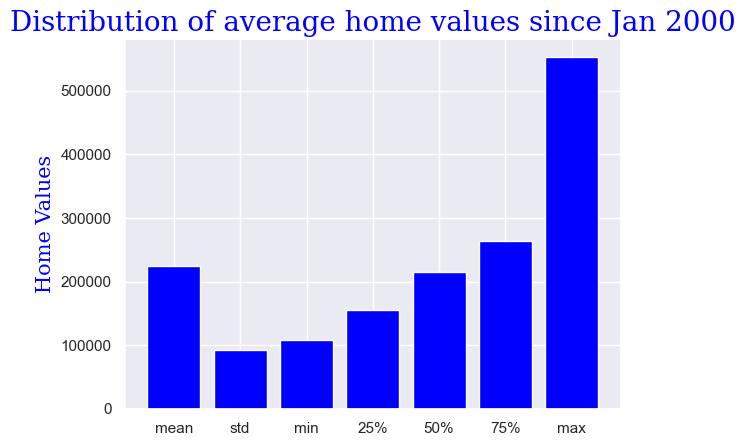

In [20]:
state_df_describe=state_df.describe()
x=state_df_describe["AverageHomeValue"][1:]
y=state_df_describe.index[1:]
plt.bar(y,x,color="blue")
plt.grid(True)

plt.title("Distribution of average home values since Jan 2000", font_title)
plt.ylabel("Home Values", font_axis)

>Observation: As Mean and Median value for the average home value is almost same for the sample, **overall distribution is symmetric!**

### Transforming dataframe to another format where we can easily deduce PERCENTAGE CHANGE for each state over a 12 month period

In [23]:
display(state_df.head())

RegionID  SizeRank     RegionName RegionType  2000-01-31  2000-02-29  \
38        61        39  West Virginia      state    73381.25    73378.21   
27        45        27       Oklahoma      state    81649.49    81685.96   
33        34        34    Mississippi      state    87181.01    87131.95   
25        24        25       Kentucky      state    86269.16    86313.76   
32         6        33       Arkansas      state    86360.43    86475.20   

    2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  2000-08-31  \
38    73402.87    73463.37    73579.82    73772.06    74023.86    74355.69   
27    81842.96    82129.31    82511.71    82875.29    83252.15    83602.88   
33    87128.90    87189.43    87493.90    87933.62    88341.79    88731.45   
25    86395.01    86596.06    86864.04    87159.33    87494.25    87877.74   
32    86605.33    86883.93    87158.50    87422.32    87676.73    87966.13   

    2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  2001-02-28  \
38    74654.78    75002.57    75456.32    76043.74    76758.27    77205.48   
27    83921.32    84207.19    84536.72    84929.54    85366.37    85789.25   
33    89076.30    89554.06    90060.43    90705.25    91290.81    91641.93   
25    88303.52    88699.82    89120.02    89556.78    90069.13    90535.03   
32    88293.99    88623.15    89053.53    89541.58    90119.84    90493.01   

    2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  2001-08-31  \
38    77543.56    77700.69    78009.54    78324.18    78639.76    78932.23   
27    86156.03    86499.28    86800.48    87099.23    87380.04    87695.24   
33    91855.90    92034.18    92359.30    92705.35    92994.13    93321.34   
25    90983.39    91384.91    91808.11    92255.13    92699.39    93089.15   
32    90772.98    90947.60    91266.55    91629.27    92046.74    92393.86   

    2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  2002-02-28  \
38    79180.77    79449.03    79612.26    79722.58    79812.16    80014.68   
27    88026.74    88338.38    88594.10    88821.93    89039.03    89306.70   
33    93622.40    94087.36    94434.99    94708.68    94844.33    94889.36   
25    93425.68    93721.00    94001.48    94251.69    94457.51    94663.80   
32    92690.27    92879.08    93009.51    93087.92    93180.08    93324.96   

    2002-03-31  2002-04-30  2002-05-31  2002-06-30  2002-07-31  2002-08-31  \
38    80304.70    80554.90    80769.48    80976.78    81230.28    81524.68   
27    89560.11    89829.36    90067.44    90311.14    90570.22    90843.89   
33    94928.19    94885.02    94991.76    95173.82    95492.43    95780.15   
25    94857.51    95056.80    95239.37    95443.18    95699.96    95984.41   
32    93505.53    93714.67    93985.98    94311.56    94689.30    95019.50   

    2002-09-30  2002-10-31  2002-11-30  2002-12-31  2003-01-31  2003-02-28  \
38    81816.56    82194.08    82448.42    82638.39    82744.63    83027.32   
27    91139.44    91425.22    91704.11    91966.51    92200.44    92436.98   
33    96116.58    96517.54    96886.97    97186.95    97341.40    97473.89   
25    96285.63    96571.92    96852.07    97098.70    97319.10    97554.00   
32    95356.98    95730.39    96116.93    96483.85    96738.43    97008.07   

    2003-03-31  2003-04-30  2003-05-31  2003-06-30  2003-07-31  2003-08-31  \
38    83393.16    83796.33    84193.02    84596.25    85013.78    85320.54   
27    92693.53    92997.21    93278.59    93531.21    93762.48    94026.16   
33    97666.23    97940.05    98219.56    98459.49    98567.79    98787.18   
25    97802.78    98066.49    98336.70    98609.18    98890.85    99183.25   
32    97274.19    97602.76    98000.21    98427.51    98900.17    99327.77   

    2003-09-30  2003-10-31  2003-11-30  2003-12-31  2004-01-31  2004-02-29  \
38    85582.23    85775.67    86052.86    86391.63    86845.74    87363.80   
27    94323.54    94599.54    94838.30    95066.72    95335.16    95640.39   
33    99026.35    99425.56    

In [24]:
state_df=state_df.iloc[:,13:].set_index(state_df.RegionName)  
# 14 is the column position for 2020-10-31 column thus giving us a starting point for october stats

In [25]:
state_df=state_df.iloc[:, ::12]
display(state_df.head())

2000-10-31  2001-10-31  2002-10-31  2003-10-31  2004-10-31  \
RegionName                                                                  
West Virginia    75002.57    79449.03    82194.08    85775.67    92113.37   
Oklahoma         84207.19    88338.38    91425.22    94599.54    98138.55   
Mississippi      89554.06    94087.36    96517.54    99425.56   103230.74   
Kentucky         88699.82    93721.00    96571.92    99854.77   103027.78   
Arkansas         88623.15    92879.08    95730.39   100211.03   106184.39   

               2005-10-31  2006-10-31  2007-10-31  2008-10-31  2009-10-31  \
RegionName                                                                  
West Virginia    99196.73   103154.18   105203.61   108966.41   101997.03   
Oklahoma        102100.20   106892.34   110086.92   110846.56   110561.34   
Mississippi     109880.28   119092.96   123500.51   119683.57   116344.80   
Kentucky        107634.45   110912.55   112244.52   111653.29   110124.39   
Arkansas        114558.69   121598.87   123625.60   122393.70   117971.84   

               2010-10-31  2011-10-31  2012-10-31  2013-10-31  2014-10-31  \
RegionName                                                                  
West Virginia   101452.36    99793.37   103002.89   102796.67   103227.74   
Oklahoma        111010.88   108236.76   109090.41   112529.76   116774.95   
Mississippi     113210.21   111552.36   111365.91   111724.29   117743.55   
Kentucky        109830.76   105965.54   107722.92   110007.38   113072.20   
Arkansas        116962.94   114000.04   117111.04   119696.86   122291.59   

               2015-10-31  2016-10-31  2017-10-31  2018-10-31  2019-10-31  \
RegionName                                                                  
West Virginia   110190.17   110936.63   112467.68   116667.27   118766.40   
Oklahoma        121459.22   125098.82   128158.39   132629.71   138802.69   
Mississippi     127840.63   130548.09   132281.74   134858.12   140694.69   
Kentucky        117529.70   122873.75   129789.59   137450.81   144537.71   
Arkansas        127017.33   132223.63   136712.16   141185.91   147485.44   

               2020-10-31  2021-10-31  2022-10-31  2023-10-31  2024-10-31  
RegionName                                                                 
West Virginia   127123.47   141802.95   154811.90   159026.86   168057.51  
Oklahoma        150649.44   172624.61   195092.11   200845.10   207274.97  
Mississippi     150232.15   169185.88   181380.92   179150.15   180612.32  
Kentucky        158467.04   177917.13   196554.89   204137.25   212754.35  
Arkansas        159357.23   181426.78   197488.81   201226.03   207658.86

In [26]:
state_df=state_df.T # transponse the dataframe to view state wise boxplots
display(state_df.head(5))
display(state_df.shape)

RegionName  West Virginia  Oklahoma  Mississippi  Kentucky  Arkansas  \
2000-10-31       75002.57  84207.19     89554.06  88699.82  88623.15   
2001-10-31       79449.03  88338.38     94087.36  93721.00  92879.08   
2002-10-31       82194.08  91425.22     96517.54  96571.92  95730.39   
2003-10-31       85775.67  94599.54     99425.56  99854.77 100211.03   
2004-10-31       92113.37  98138.55    103230.74 103027.78 106184.39   

RegionName    Kansas   Indiana      Iowa      Ohio   Alabama  Michigan  \
2000-10-31  89796.64  98523.71  93928.22 109362.83 100406.91 119818.78   
2001-10-31  95830.81 102218.11  98428.84 114030.37 104425.11 127444.59   
2002-10-31  97788.57 103528.40 102563.19 117687.58 107013.84 132628.29   
2003-10-31 101437.02 105754.21 107043.82 122379.65 110383.98 137771.37   
2004-10-31 107024.61 109090.90 111507.59 126660.29 114746.73 143090.28   

RegionName  Missouri  Nebraska  Louisiana  Tennessee  Pennsylvania  \
2000-10-31 100502.69 115664.53  108880.86  110965.88     102709.71   
2001-10-31 107561.24 107931.74  115041.98  115003.47     108434.89   
2002-10-31 114604.11 111679.99  120073.44  117569.56     115910.94   
2003-10-31 121837.79 117081.11  124356.48  120885.87     125879.27   
2004-10-31 127963.26 123062.89  131262.87  125737.87     138611.32   

RegionName  South Carolina     Texas  South Dakota   Georgia  Wisconsin  \
2000-10-31       116238.77 112268.38     107327.77 128520.76  123985.06   
2001-10-31       121308.37 113550.47     109984.17 137399.24  131470.99   
2002-10-31       124355.69 117304.83     113758.56 143214.21  138749.75   
2003-10-31       128713.11 120057.03     118901.84 147229.12  148925.54   
2004-10-31       135190.92 128306.57     126635.22 152215.96  161923.34   

RegionName  Illinois  North Carolina  New Mexico     Maine  North Dakota  \
2000-10-31 134062.59       131949.80   189407.56 112258.72     214562.01   
2001-10-31 144991.58       136819.05   189407.56 125362.47     214562.01   
2002-10-31 156157.98       139500.21   134665.04 140663.10     214562.01   
2003-10-31 167912.94       142376.88   138928.05 157703.61     214562.01   
2004-10-31 181863.99       146610.01   147615.34 179931.76     214562.01   

RegionName  Minnesota   Florida     Idaho   Wyoming   Vermont   Arizona  \
2000-10-31  137360.20 118489.51 123508.82 226222.39 119808.40 142318.37   
2001-10-31  155717.06 129162.31 128601.04 226222.39 129857.58 150027.09   
2002-10-31  170312.51 141816.31 131903.97 143771.31 141001.92 157843.85   
2003-10-31  185125.55 158363.15 135631.39 150822.67 154572.87 167513.32   
2004-10-31  200149.50 183803.83 142722.30 162718.48 172449.93 186714.87   

RegionName  Virginia  Delaware   Montana  New York    Alaska    Nevada  \
2000-10-31 130555.33 154601.96 255092.16 146394.81 137085.56 165294.55   
2001-10-31 141809.92 163871.17 255092.16 158234.71 167124.93 176001.19   
2002-10-31 155717.09 176284.70 255092.16 173099.06 175334.95 187098.01   
2003-10-31 172831.11 194543.57 255092.16 192011.52 186535.57 207392.15   
2004-10-31 205018.10 219493.43 255092.16 211999.21 201071.19 284516.51   

RegionName  New Hampshire  Rhode Island      Utah  Connecticut    Oregon  \
2000-10-31      148441.59     140537.99 176908.56    180511.04 156230.76   
2001-10-31      171309.13     157932.30 180315.31    197578.08 162163.49   
2002-10-31      193151.10     187293.13 180651.10    219097.68 169314.47   
2003-10-31      219429.14     224244.11 181274.14    246016.12 179288.43   
2004-10-31      242850.85     263455.33 184073.69    275799.94 195872.75   

RegionName  Maryland  Colorado  Washington  New Jersey  Massachusetts  \
2000-10-31 159114.63 192869.69   182022.74   184239.16      215060.92   
2001-10-31 170296.47 214053.10   191051.12   204923.01      248448.24   
2002-10-31 189787.67 222214.32   198980.18   232959.01      281884.90   
2003-10-31 216630.84 225069.12   210853.20   269448.11      318155.90   
2004-10-31 257127.90 230775.32   232125.32   307758.10      350540.58   

R

(25, 51)

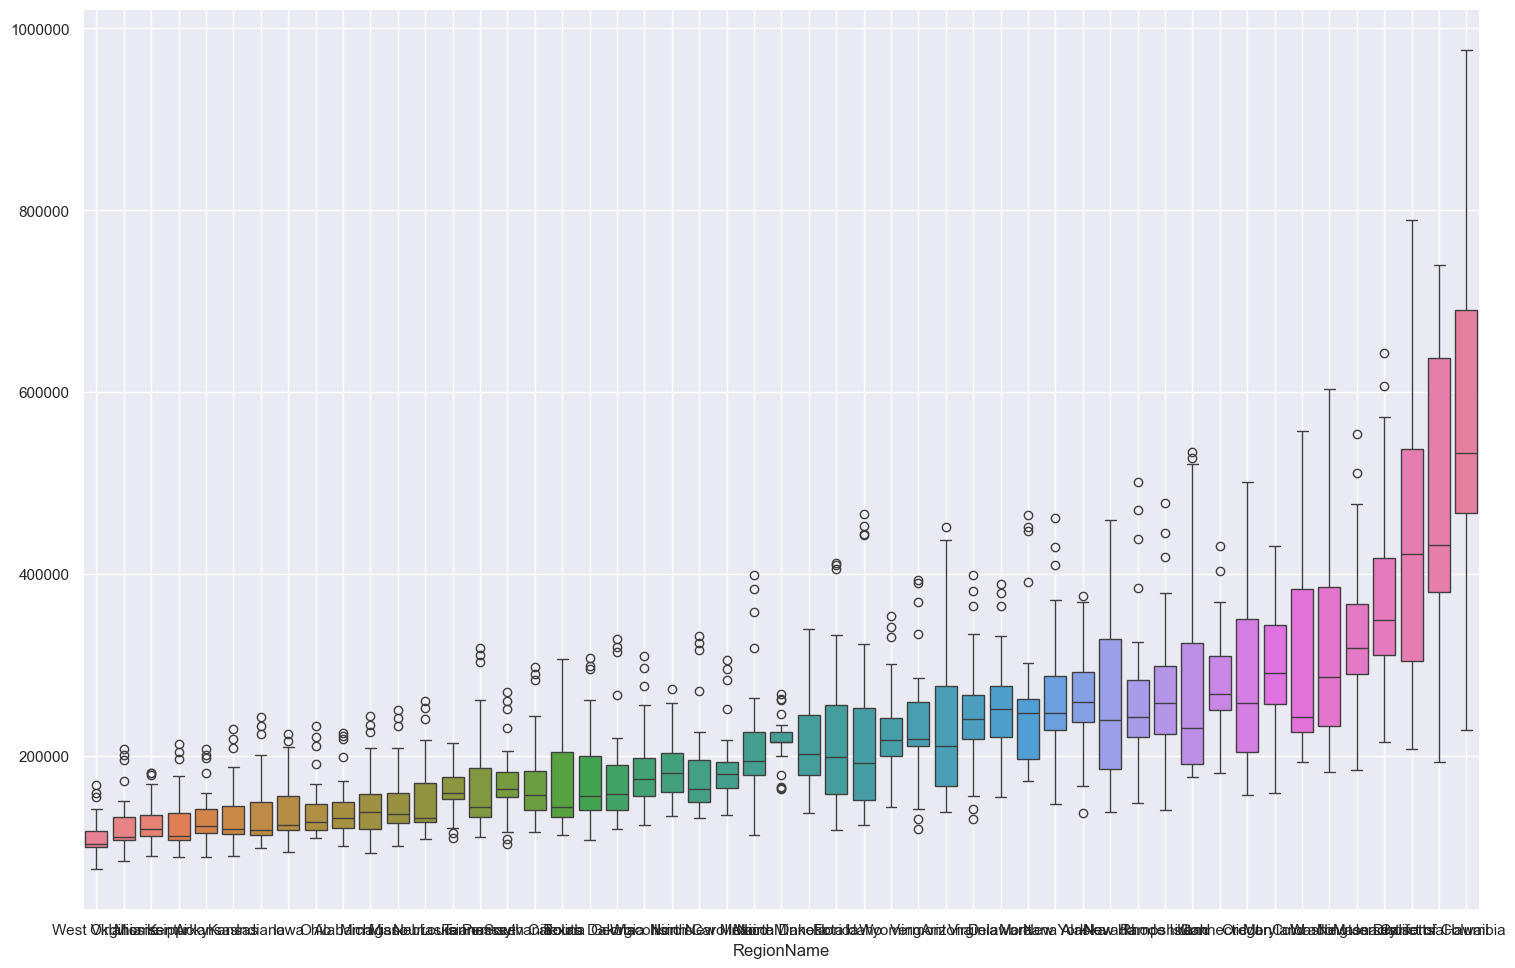

In [27]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
bxplt=sns.boxplot(state_df)
state_df.index = pd.to_datetime(state_df.index, errors='coerce')
plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(axis="y", style="plain")

> Observation : very few outliers thus working with this data as is to avoid missing trends.

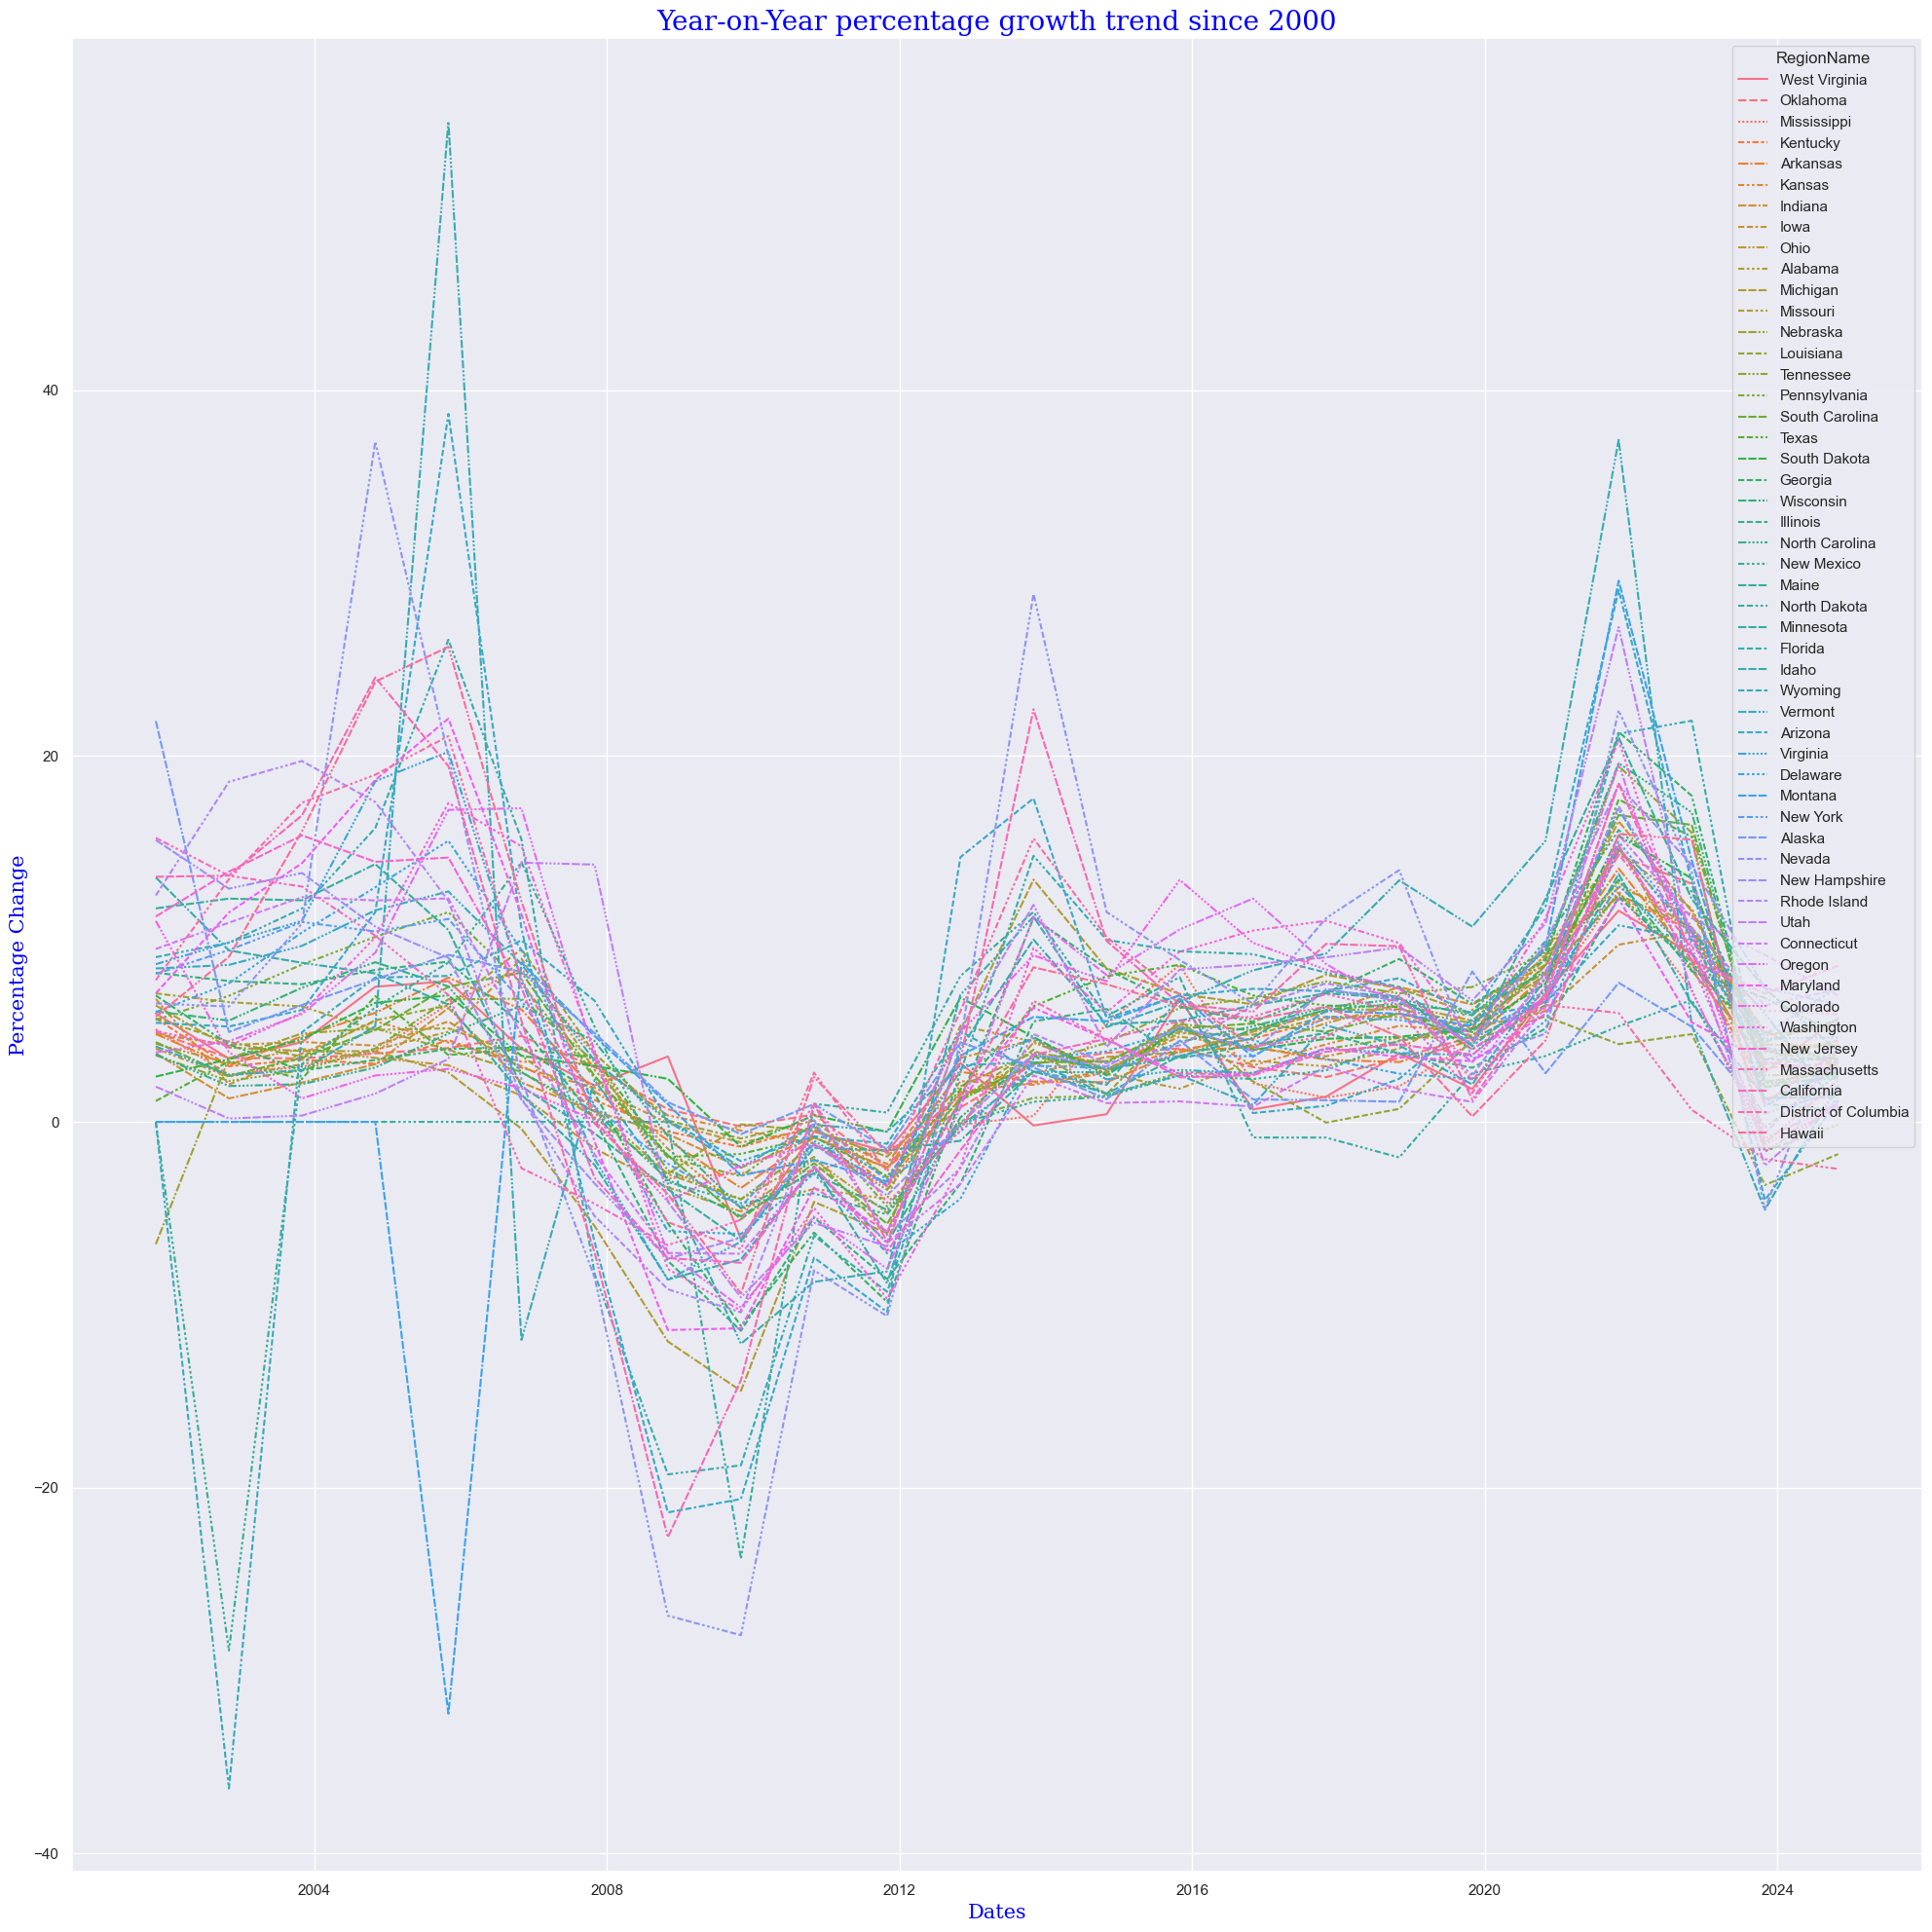

In [29]:
state_df_change_by_year= state_df.pct_change(periods=1)*100
plt.figure(figsize=(20, 20))
lnplt=sns.lineplot(data=state_df_change_by_year)
plt.title("Year-on-Year percentage growth trend since 2000", fontdict=font_title)
plt.xlabel("Dates", fontdict=font_axis)
plt.ylabel("Percentage Change", fontdict=font_axis)
plt.grid(True)
plt.tight_layout()
plt.show()

>Observation: There has been periods of high variance (both postive and negative ) every 4-5 years.
>
>Considering only last 3 years to calclulate which states shows best growth in value year-on-year

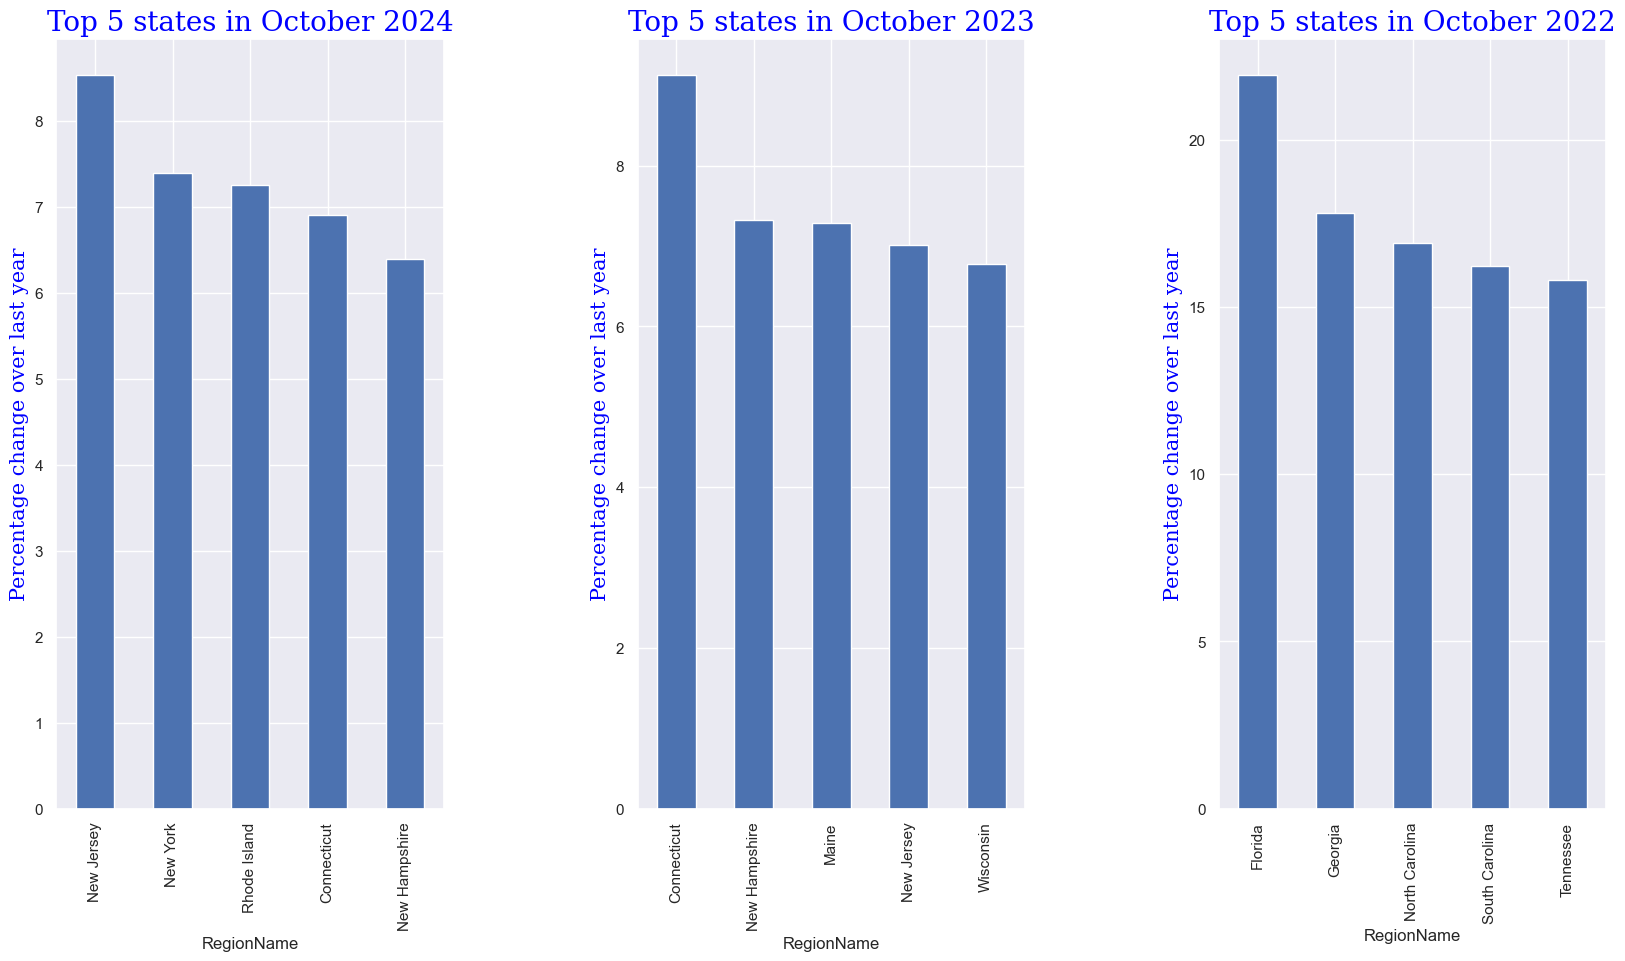

In [31]:
# Select the latest month for trend analysis and only considering top 5 for each year
row_to_plot_2024 = state_df_change_by_year.loc['2024-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2023 = state_df_change_by_year.loc['2023-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2022 = state_df_change_by_year.loc['2022-10-31'].sort_values(ascending=False)[:5] 

top5_states_2024_index=row_to_plot_2024.index
top5_states_2023_index=row_to_plot_2023.index
top5_states_2022_index=row_to_plot_2022.index
top_states_3years_index=top5_states_2024_index.append(top5_states_2023_index).append(top5_states_2022_index).unique()
# we will use these index further to plot various relationships

plt.figure(figsize=(20, 10))

# Customize the plot
plt.subplot(1,3,1)
row_to_plot_2024.plot(kind='bar')
plt.title('Top 5 states in October 2024', fontdict=font_title)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplot(1,3,2)
row_to_plot_2023.plot(kind='bar')
plt.title('Top 5 states in October 2023', fontdict=font_title)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplot(1,3,3)
row_to_plot_2022.plot(kind='bar')
plt.title('Top 5 states in October 2022', fontdict=font_title)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

## Slicing data to understand growth trends for last 3 years 

In [33]:
state_df_change_by_year_Last3Years=state_df_change_by_year[top_states_3years_index]['2022-10-31':]

<Axes: title={'center': 'States showing most promise in last 3 years'}, xlabel='Percentage growth with variance', ylabel='States'>

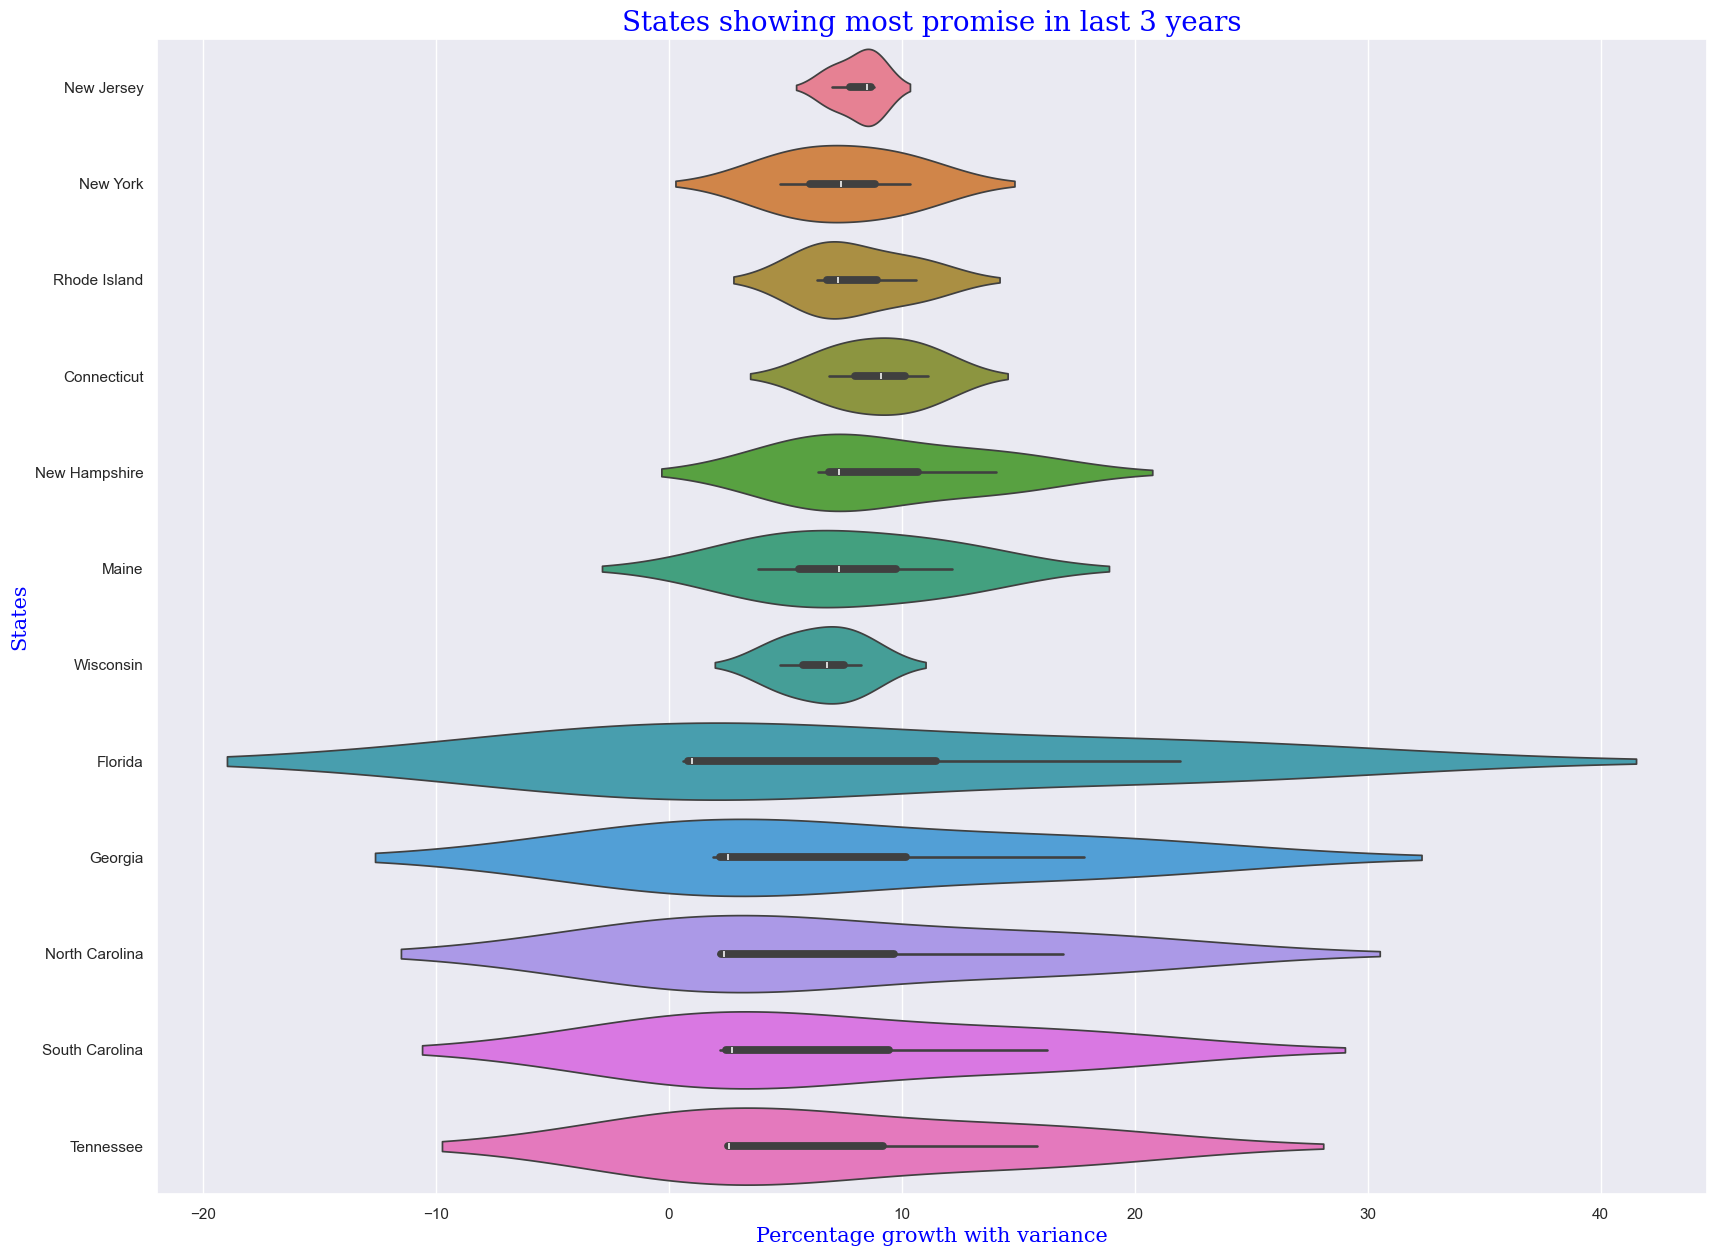

In [34]:
plt.figure(figsize=(20, 15))
# Customize the plot
plt.title('States showing most promise in last 3 years', fontdict=font_title)
plt.xlabel('Percentage growth with variance', fontdict=font_axis)
plt.ylabel('States', fontdict=font_axis)
sns.violinplot(state_df_change_by_year_Last3Years,orient="h")

>Observation: Eventhough these states have shown high percentage growth in the last few years some of them have very high variance. To be more conservative in our investment profile, we would coinsider only states having percentage high growth but low variance in growth.
>> `New York, New Jersey, Rhode Island, Wisconsin, Connecticut, New Hampshire` have the least variance in terms of percentage change
>> Checking again against each other since 2020

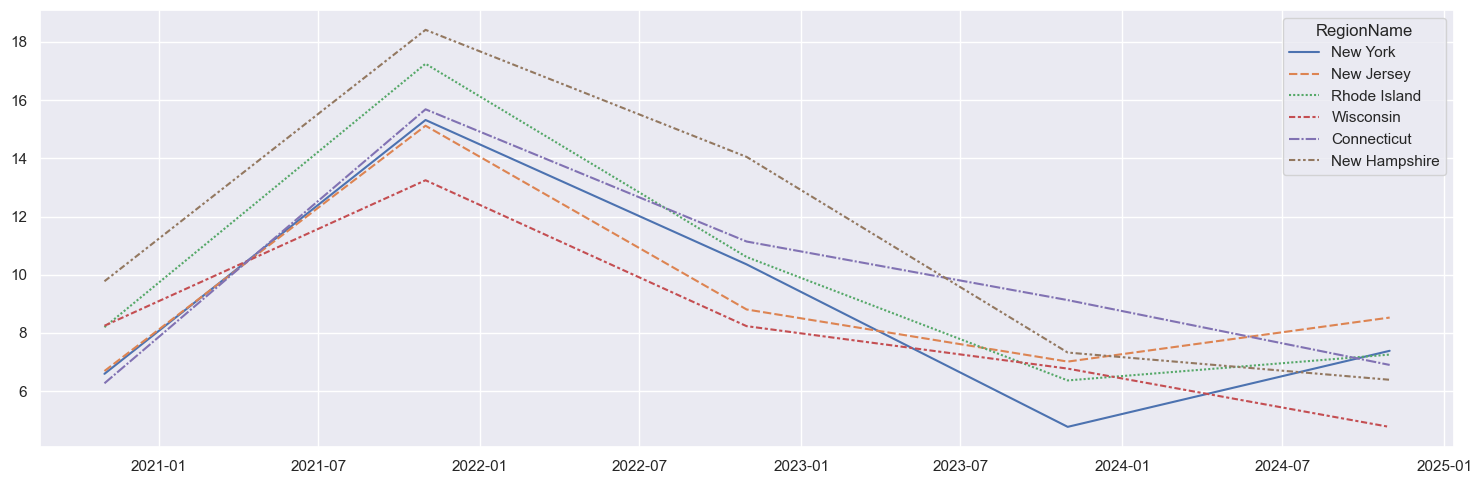

In [36]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.lineplot(state_df_change_by_year[["New York","New Jersey","Rhode Island","Wisconsin","Connecticut","New Hampshire"]]['2020-10-31':])
plt.grid(True)
plt.tight_layout()

> New York, New Jersey & Rhode Island upward steep trend in the last year compared to other states, so narrowing down on these 4 states to obserrve patterns

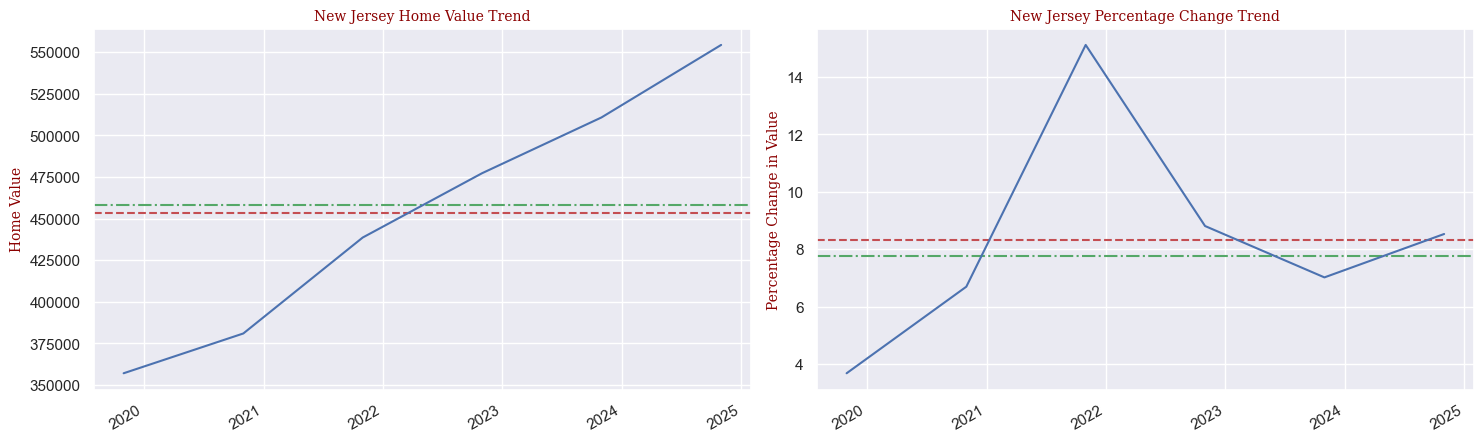

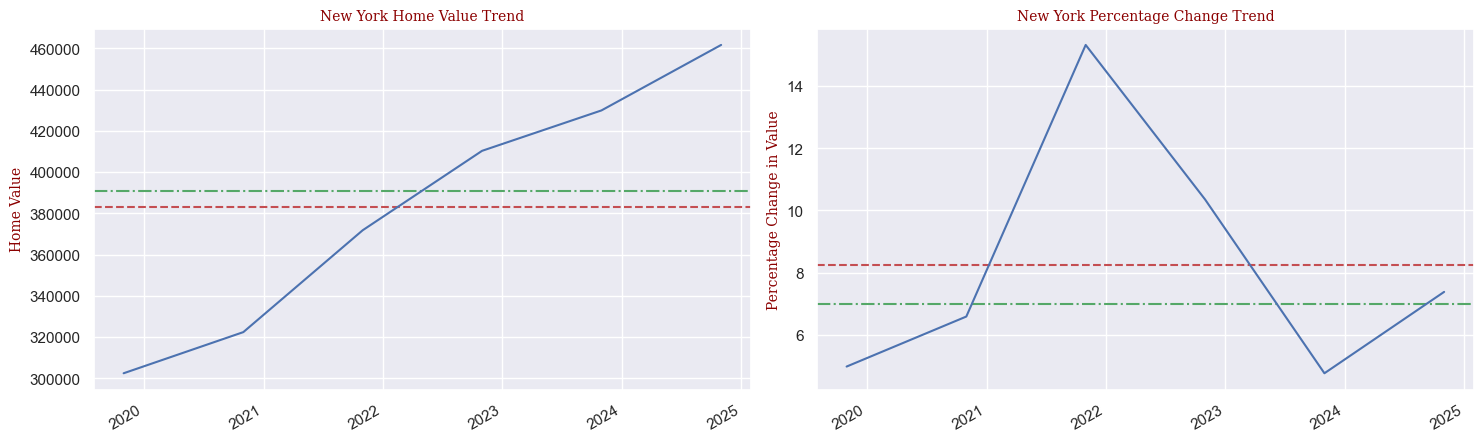

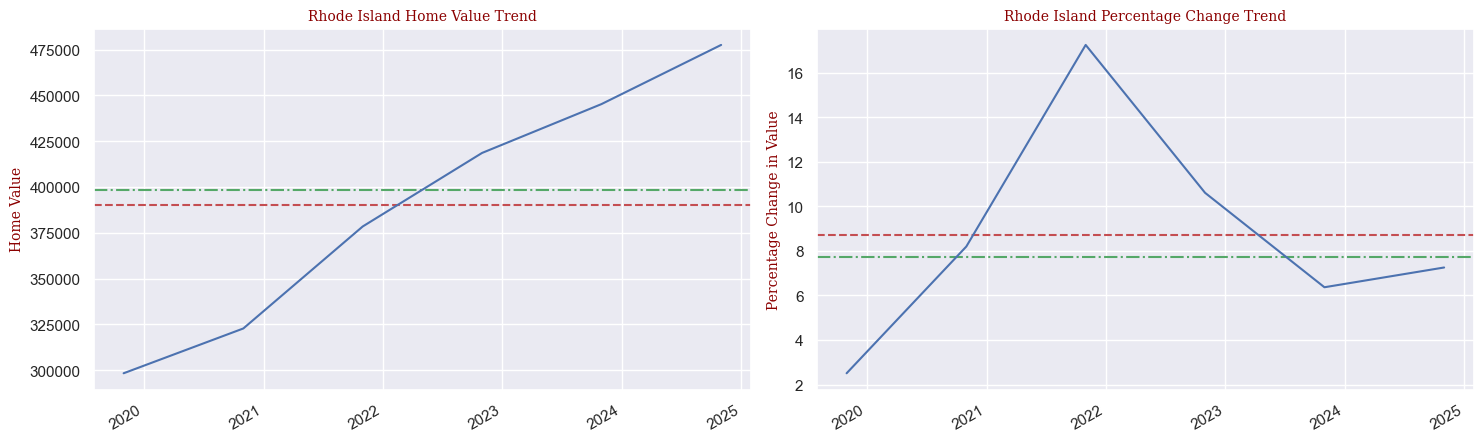

In [38]:
New_Jersey_value_df=state_df["New Jersey"]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.axhline(y=New_Jersey_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_Jersey_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New Jersey Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
New_Jersey_value_df.plot(kind="line")
New_Jersey_pctg_df=state_df_change_by_year["New Jersey"]['2019-10-31':]
plt.subplot(3,2,2)
plt.axhline(y=New_Jersey_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_Jersey_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New Jersey Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
New_Jersey_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

New_York_value_df=state_df["New York"]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.axhline(y=New_York_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_York_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New York Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
New_York_value_df.plot(kind="line")
New_York_pctg_df=state_df_change_by_year["New York"]['2019-10-31':]
plt.subplot(3,2,2)
plt.axhline(y=New_York_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_York_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New York Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
New_York_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

Rhode_Island_value_df=state_df["Rhode Island"]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.axhline(y=Rhode_Island_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=Rhode_Island_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Rhode Island Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
Rhode_Island_value_df.plot(kind="line")
Rhode_Island_pctg_df=state_df_change_by_year["Rhode Island"]['2019-10-31':]
plt.subplot(3,2,2)
plt.axhline(y=Rhode_Island_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=Rhode_Island_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Rhode Island Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
Rhode_Island_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

## observe our final 3 states with biggest positive change in the last 3 years 

In [40]:
top_states_3years=state_df[["New Jersey","New York","Rhode Island"]]['2019-10-31':]
display(top_states_3years.head())

RegionName  New Jersey  New York  Rhode Island
2019-10-31   357079.11 302459.42     298336.54
2020-10-31   380970.84 322404.77     322789.99
2021-10-31   438569.78 371784.32     378465.16
2022-10-31   477190.19 410283.00     418615.94
2023-10-31   510665.70 429865.81     445273.88

In [41]:
display(top_states_3years.describe())

RegionName  New Jersey  New York  Rhode Island
count             6.00      6.00          6.00
mean         453115.03 383068.76     390177.06
std           75831.46  62298.40      70138.04
min          357079.11 302459.42     298336.54
25%          395370.58 334749.66     336708.78
50%          457879.98 391033.66     398540.55
75%          502296.82 424970.11     438609.40
max          554214.53 461615.26     477580.87

# Looking at the above Data we would recommend investing in the state of New York 

> Lowest standard deviation for Growth rate for last 3 years
>> upward trend is also steep in the last year.

### Based on state analysis done earlier we will deep dive into zip based data for New Jersey, New York & Rhode Island to idenify the most promising areas in these states.

In [44]:
zip_df_original = pd.read_csv('Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')

In [45]:
display(zip_df_original.head())
display(zip_df_original.tail())
display(zip_df_original.shape)

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     91982         1       77494        zip        TX    TX      Katy   
1     61148         2        8701        zip        NJ    NJ  Lakewood   
2     91940         3       77449        zip        TX    TX      Katy   
3     62080         4       11368        zip        NY    NY  New York   
4     91733         5       77084        zip        TX    TX   Houston   

                                   Metro        CountyName  2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County   209467.46   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County   166992.44   
2   Houston-The Woodlands-Sugar Land, TX     Harris County   102307.83   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County   296232.13   
4   Houston-The Woodlands-Sugar Land, TX     Harris County   101571.79   

   2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
0   209647.72   210132.82   211113.46   211148.80   210996.26   210239.63   
1   167724.98   168253.62   169720.11   171261.28   172987.56   174326.16   
2   102321.83   102196.21   102186.56   102233.28   102423.27   102609.38   
3   298978.92   301341.79   305024.85   307840.19   310423.48   313725.64   
4   101527.85   101346.35   101262.71   101236.26   101371.59   101468.80   

   2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  \
0   210271.52   210040.84   210412.52   211262.44   212409.29   213107.43   
1   175735.49   177599.67   179842.87   182176.27   184127.51   185904.80   
2   102844.54   103199.31   103488.85   103883.73   104272.54   104348.82   
3   317050.51   320620.71   324725.38   329079.76   333295.14   337152.44   
4   101657.19   102015.13   102371.90   102848.06   103373.65   103657.90   

   2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  \
0   212808.68   212098.10   211338.32   212013.15   213271.04   214444.67   
1   187773.03   189852.16   191973.87   193707.30   195255.68   196913.51   
2   104178.74   103714.70   103474.96   103470.98   103601.46   103761.00   
3   341048.77   344904.17   349249.20   353423.30   357504.76   361056.79   
4   103696.96   103336.71   103078.85   102982.44   103065.61   103292.42   

   2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  \
0   215028.07   214939.07   214957.05   214646.08   213905.57   213266.58   
1   198808.02   201377.60   203765.66   205678.75   206783.92   208184.98   
2   103679.15   103705.66   103839.86   104074.56   104220.00   104280.38   
3   364331.63   367373.06   370346.98   374891.76   380809.71   387278.64   
4   103306.03   103437.65   103583.11   103845.43   104001.59   104093.62   

   2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  2002-07-31  \
0   212821.61   213226.47   213798.75   214729.19   215551.40   215728.62   
1   210246.41   212692.82   215258.14   217829.27   220842.84   224332.16   
2   104364.36   104725.85   105252.79   105790.72   106238.14   106722.56   
3   392486.42   396369.19   399563.67   402404.64   405812.32   409389.73   
4   104250.13   104650.77   105238.94   105853.54   106396.54   106841.32   

   2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  2003-01-31  \
0   215408.80   214428.00   213770.06   213041.31   213374.64   214329.89   
1   228442.55   233308.86   238835.47   244518.39   249261.27   253131.27   
2   107351.88   107970.76   108529.98   108927.04   109263.10   109491.18   
3   413334.77   417047.38   420366.06   423070.10   425409.30   427966.46   
4   107309.74   107687.08   108025.64   108214.67   108428.05   108638.14   

   2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  2003-07-31  \
0   215601.15   216454.66   216916.07   217217.42   217732.12   218275.72   
1   256817.29   261102.91   265618.55   270200.09   274515.55   279104.00   
2   109660.06   109888.54   110193.60   110584.61   110908.37   111193.74   
3   430758.45   433311.85  

RegionID  SizeRank  RegionName RegionType StateName State         City  \
26219     67377     39992       22731        zip        VA    VA        Aroda   
26220     78282     39992       46799        zip        IN    IN   Zanesville   
26221     80861     39992       52163        zip        IA    IA     Protivin   
26222     69074     39992       26576        zip        WV    WV   Farmington   
26223     80190     39992       50160        zip        IA    IA  Martensdale   

                                              Metro      CountyName  \
26219  Washington-Arlington-Alexandria, DC-VA-MD-WV  Madison County   
26220                                  Bluffton, IN    Wells County   
26221                                           NaN   Howard County   
26222                                  Fairmont, WV   Marion County   
26223                Des Moines-West Des Moines, IA   Warren County   

       2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2001-01-31  2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2001-07-31  2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2002-01-31  2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2002-07-31  2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220         NaN         NaN         NaN         NaN         NaN         NaN   
26221         NaN         NaN         NaN         NaN         NaN         NaN   
26222         NaN         NaN         NaN         NaN         NaN         NaN   
26223         NaN         NaN         NaN         NaN         NaN         NaN   

       2003-01-31  2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  \
26219         NaN         NaN         NaN         NaN         NaN         NaN   
26220    

(26224, 307)

### Limiting our research to only 3 states NJ, NY & RI

In [47]:
zip_df=zip_df_original.loc[zip_df_original.State.isin(["NJ","NY","RI"])]
display(zip_df.head())

RegionID  SizeRank  RegionName RegionType StateName State      City  \
1      61148         2        8701        zip        NJ    NJ  Lakewood   
3      62080         4       11368        zip        NY    NY  New York   
6      62093         7       11385        zip        NY    NY  New York   
8      62019         9       11208        zip        NY    NY  New York   
15     62046        16       11236        zip        NY    NY  New York   

                                    Metro     CountyName  2000-01-31  \
1   New York-Newark-Jersey City, NY-NJ-PA   Ocean County   166992.44   
3   New York-Newark-Jersey City, NY-NJ-PA  Queens County   296232.13   
6   New York-Newark-Jersey City, NY-NJ-PA  Queens County   278182.35   
8   New York-Newark-Jersey City, NY-NJ-PA   Kings County   187280.99   
15  New York-Newark-Jersey City, NY-NJ-PA   Kings County   216979.96   

    2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
1    167724.98   168253.62   169720.11   171261.28   172987.56   174326.16   
3    298978.92   301341.79   305024.85   307840.19   310423.48   313725.64   
6    279407.14   280909.38   283052.65   284538.93   285801.48   286975.70   
8    187652.66   187959.80   188812.52   190021.65   191513.77   193289.97   
15   217865.79   218718.53   220857.53   223286.19   226115.04   228720.85   

    2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  \
1    175735.49   177599.67   179842.87   182176.27   184127.51   185904.80   
3    317050.51   320620.71   324725.38   329079.76   333295.14   337152.44   
6    289005.06   291016.01   293938.70   296851.46   299461.86   301243.81   
8    194292.43   194992.59   195151.86   195585.30   196021.26   196778.30   
15   230749.83   232130.63   233246.52   234561.51   236098.67   237895.32   

    2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  \
1    187773.03   189852.16   191973.87   193707.30   195255.68   196913.51   
3    341048.77   344904.17   349249.20   353423.30   357504.76   361056.79   
6    303463.63   307011.49   311175.50   314984.19   317837.90   320943.18   
8    197689.80   198891.44   199814.60   200928.35   202027.53   203245.18   
15   240285.32   243372.07   246227.57   248379.36   249886.01   251438.55   

    2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  \
1    198808.02   201377.60   203765.66   205678.75   206783.92   208184.98   
3    364331.63   367373.06   370346.98   374891.76   380809.71   387278.64   
6    323679.38   325505.69   326324.36   327881.17   330396.78   333819.84   
8    204108.85   205451.29   207055.59   209623.01   212602.27   215751.57   
15   253119.69   254838.22   256700.74   258687.41   260918.28   263543.81   

    2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  2002-07-31  \
1    210246.41   212692.82   215258.14   217829.27   220842.84   224332.16   
3    392486.42   396369.19   399563.67   402404.64   405812.32   409389.73   
6    334515.07   334534.95   333935.24   335287.93   337640.58   340536.10   
8    218273.46   217763.75   216184.17   214474.35   214809.93   215889.60   
15   265872.87   264421.27   261382.78         NaN   258107.40   258956.75   

    2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  2003-01-31  \
1    228442.55   233308.86   238835.47   244518.39   249261.27   253131.27   
3    413334.77   417047.38   420366.06   423070.10   425409.30   427966.46   
6    343750.09   346641.44   349323.10   351695.31   354011.30   356486.00   
8    220025.82   224897.07   229728.62   231492.28   232472.75   233360.15   
15   263340.19   268692.78   274384.23   276962.37   278612.18   279797.80   

    2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  2003-07-31  \
1    256817.29   261102.91   265618.55   270200.09   274515.55   279104.00   
3    430758.45   433311.85   435626.12   437952.94   437529.41         NaN   
6    359035.04   361243.75   363098.71   364809.64   367709.21   370363.

### slicing  our data to only include zipcodes and home values for easier plotting

In [49]:
zip_df=zip_df.iloc[:,18:].set_index(zip_df.RegionName) 
# 18 is the column position for 2020-10-31 column thus giving us a starting point for october stats
zip_df=zip_df.iloc[:, ::12]
display(zip_df.head())

2000-10-31  2001-10-31  2002-10-31  2003-10-31  2004-10-31  \
RegionName                                                               
8701         179842.87   203765.66   238835.47   289328.56   332742.26   
11368        324725.38   370346.98   420366.06   417862.08   466899.58   
11385        293938.70   326324.36   349323.10   384549.69   435831.55   
11208        195151.86   207055.59   229728.62   257478.26   308104.56   
11236        233246.52   256700.74   274384.23   301761.87   348842.27   

            2005-10-31  2006-10-31  2007-10-31  2008-10-31  2009-10-31  \
RegionName                                                               
8701         379557.13   405682.86   378038.54   341555.91   313299.45   
11368        567263.06   632344.26   636501.73   600221.76   503115.25   
11385        505742.95   552129.33   535452.34   508365.73   458563.89   
11208        379666.02   432234.36   438777.01   437305.93   345016.70   
11236        414912.17   471792.04   475376.97   454197.60   398004.83   

            2010-10-31  2011-10-31  2012-10-31  2013-10-31  2014-10-31  \
RegionName                                                               
8701         294102.59   272786.92   279582.73   298879.02   321396.48   
11368        507028.40   495158.30   472647.07   500742.93   551976.77   
11385        460709.34   453132.91   461018.07   492055.55   539861.75   
11208        331663.35   314684.30   313645.14   328981.61   359958.03   
11236        402750.67   387988.27   382528.45   394708.15   400013.46   

            2015-10-31  2016-10-31  2017-10-31  2018-10-31  2019-10-31  \
RegionName                                                               
8701         357026.33   388426.71   416886.82   418921.93   413899.44   
11368        626920.31   678896.57   743249.65   772125.53   801864.02   
11385        595241.40   664257.44   712803.04   747205.16   776261.58   
11208        410809.12   439208.46   479080.76   518113.80   581368.13   
11236        429877.64   457411.87   490431.29   524934.09   574763.93   

            2020-10-31  2021-10-31  2022-10-31  2023-10-31  2024-10-31  
RegionName                                                              
8701         431110.58   518769.57   638098.99   715429.70   797740.05  
11368        816065.70   837323.39   869879.88   849426.03   885296.99  
11385        783657.55   797703.91   830281.48   823884.48   840494.46  
11208        596716.91   627022.38   657577.70   666993.92   687783.74  
11236        594784.44   634598.62   660028.86   663862.08   683133.39

### Checking for outliers in our dataset

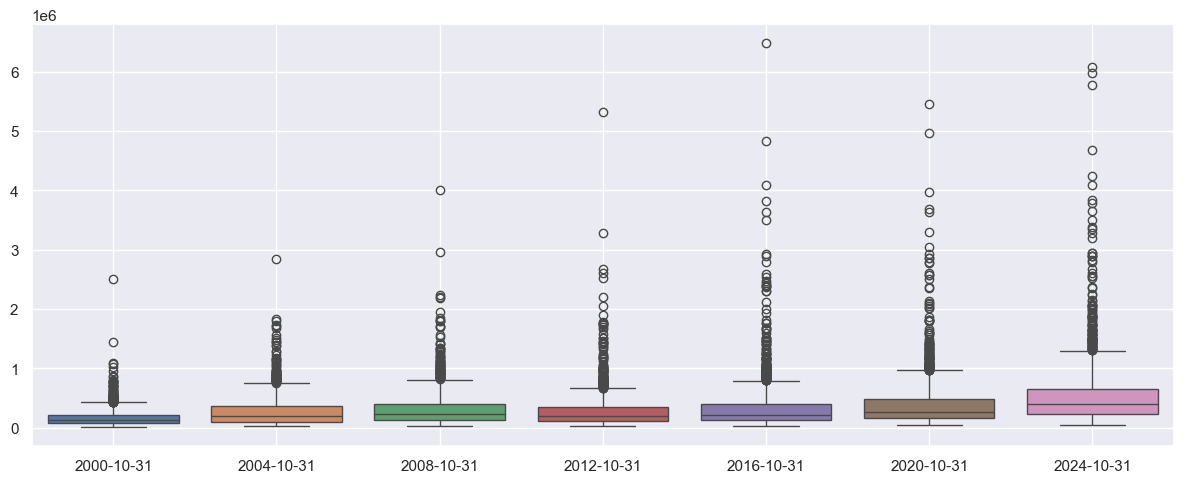

In [51]:
# checking outliers for partial slice of data(all zips every 4th year) as the whole data set is too broad to visualize in a single plot

plt.figure(figsize=(12, 5))
sns.boxplot(zip_df.iloc[:, ::4])
plt.tight_layout()
plt.grid(True)

### we conclude that we should get rid of the outliers before proceeding

In [53]:
# Select only numeric columns for calculating quantiles and IQR
numeric_df = zip_df.select_dtypes(include=[float, int])

# Calculate Q1, Q3, and IQR on the numeric DataFrame
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame using the numeric DataFrame's IQR mask
zip_df = zip_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(zip_df.shape)

(1983, 25)


### after removing outliers

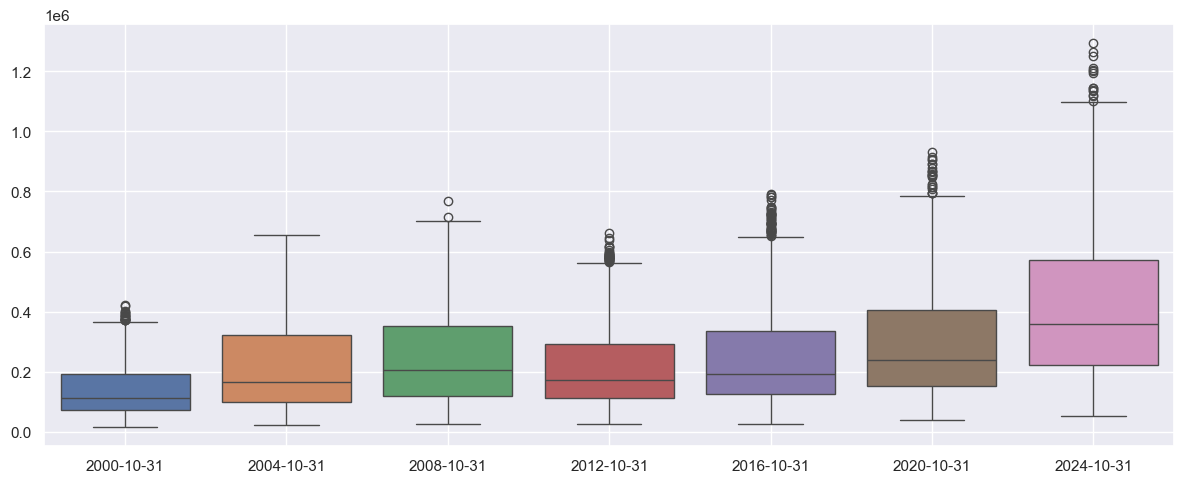

In [55]:
plt.figure(figsize=(12, 5))
sns.boxplot(zip_df.iloc[:, ::4])
plt.tight_layout()
plt.grid(True)

> As visible thorugh the above 2 boxplots large amount of outliers are removed.

In [57]:
display(zip_df.info())
display(zip_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1983 entries, 8701 to 14441
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2000-10-31  1868 non-null   float64
 1   2001-10-31  1871 non-null   float64
 2   2002-10-31  1874 non-null   float64
 3   2003-10-31  1876 non-null   float64
 4   2004-10-31  1869 non-null   float64
 5   2005-10-31  1893 non-null   float64
 6   2006-10-31  1892 non-null   float64
 7   2007-10-31  1899 non-null   float64
 8   2008-10-31  1903 non-null   float64
 9   2009-10-31  1905 non-null   float64
 10  2010-10-31  1910 non-null   float64
 11  2011-10-31  1910 non-null   float64
 12  2012-10-31  1928 non-null   float64
 13  2013-10-31  1936 non-null   float64
 14  2014-10-31  1941 non-null   float64
 15  2015-10-31  1948 non-null   float64
 16  2016-10-31  1959 non-null   float64
 17  2017-10-31  1960 non-null   float64
 18  2018-10-31  1965 non-null   float64
 19  2019-10-31  1973 non-null   

None

(1983, 25)

### Looking for any duplicates in the data

In [59]:
display(zip_df.shape)
duplicate_rows_df = zip_df[zip_df.duplicated()]
display("number of duplicate rows: ", duplicate_rows_df.shape)

(1983, 25)

'number of duplicate rows: '

(0, 25)

### looking for NAN/missing data

In [61]:
display(zip_df.isnull().sum())

2000-10-31    115
2001-10-31    112
2002-10-31    109
2003-10-31    107
2004-10-31    114
2005-10-31     90
2006-10-31     91
2007-10-31     84
2008-10-31     80
2009-10-31     78
2010-10-31     73
2011-10-31     73
2012-10-31     55
2013-10-31     47
2014-10-31     42
2015-10-31     35
2016-10-31     24
2017-10-31     23
2018-10-31     18
2019-10-31     10
2020-10-31     41
2021-10-31      8
2022-10-31      8
2023-10-31      7
2024-10-31      0
dtype: int64

>Very large amount of data is missing, but dropping them is not a good idea as we will remove lot of data before 2024-01-31 from the equation.
**As our goal here is to observe month on month OR year on  year growth in each state a better approach is to clean the data & replace NAN with values which may not impact the trend patterns for the specific row**

>We choose to backfill the data as it should not have huge impact on our growth trend analysis.

In [63]:
zip_df=zip_df.bfill(axis=1)

### Transforming dataframe to another format where we can easily deduce PERCENTAGE CHANGE for each state over a 12 month period

In [65]:
zip_df=zip_df.T
zip_df.index = pd.to_datetime(zip_df.index, errors='coerce')
display(zip_df.tail())

RegionName     8701      11368     11385     11208     11236     10467  \
2020-10-31 431110.58 816065.70 783657.55 596716.91 594784.44 445360.05   
2021-10-31 518769.57 837323.39 797703.91 627022.38 634598.62 494297.45   
2022-10-31 638098.99 869879.88 830281.48 657577.70 660028.86 522451.41   
2023-10-31 715429.70 849426.03 823884.48 666993.92 663862.08 584692.86   
2024-10-31 797740.05 885296.99 840494.46 687783.74 683133.39 597890.31   

RegionName     11373     11207     11234     10314     10456     10458  \
2020-10-31 908366.21 571094.72 696790.83 611584.58 556627.16 525398.36   
2021-10-31 907012.61 596271.47 714443.79 636497.97 589252.95 548061.11   
2022-10-31 955410.61 620508.88 742769.84 682617.43 576425.12 568960.51   
2023-10-31 931031.80 624156.55 750116.03 685016.77 562233.31 549020.76   
2024-10-31 947442.65 636190.48 767895.41 706187.31 568074.84 589278.32   

RegionName     11377     11235     11229     10453     10468     11203  \
2020-10-31 854023.60 866543.20 820440.98 594661.61 538016.83 632909.26   
2021-10-31 854690.63 891877.07 836265.45 641096.54 560006.61 664254.05   
2022-10-31 892591.89 927817.24 876640.04 635766.84 548772.05 691179.76   
2023-10-31 881769.33 932509.75 883912.95 631724.54 535547.44 686265.01   
2024-10-31 926148.87 972914.81 911336.43 637897.11 545246.21 712026.38   

RegionName     10457     10452     10469     11212     10462     10466  \
2020-10-31 518666.14 532884.66 535047.52 536882.54 569176.52 518453.44   
2021-10-31 541557.51 576984.43 573336.63 568391.76 603392.77 559606.04   
2022-10-31 537852.47 512545.17 600755.58 591404.62 623469.52 582430.26   
2023-10-31 538220.96 499735.38 606936.15 600842.38 609775.79 583972.87   
2024-10-31 565436.51 481824.78 635285.24 614004.58 663127.46 611284.95   

RegionName     11691     10463     14850     7055      7305      10977  \
2020-10-31 567718.67 728853.85 288097.32 395254.89 414212.94 517197.38   
2021-10-31 620323.29 761346.96 323154.92 453991.09 453845.53 579963.03   
2022-10-31 666982.12 793844.68 360592.40 499882.18 473155.49 688885.78   
2023-10-31 665302.74 761239.32 380423.18 521697.57 483774.62 751453.84   
2024-10-31 681815.08 811643.63 399633.15 560943.10 527386.24 845745.21   

RegionName     11210     11372      11432     10472     7087      11746  \
2020-10-31 891657.71 846959.95  892312.29 593223.47 534089.60 528631.47   
2021-10-31 897956.19 867939.59  926522.70 622851.11 574579.74 611570.31   
2022-10-31 935314.93 913660.91  968788.73 637368.71 580361.41 649853.14   
2023-10-31 928009.80 865230.69  957319.36 636007.51 547275.94 686151.58   
2024-10-31 951026.49 935764.68 1004448.72 669250.24 628096.89 757917.20   

RegionName     11434     10312     11706     11717     8753      10032  \
2020-10-31 585764.73 601643.61 442021.22 428477.85 317951.36 878888.91   
2021-10-31 628240.21 633205.98 503108.53 483500.19 391531.16 922967.65   
2022-10-31 662571.41 683819.91 530793.62 519596.77 448902.02 920352.82   
2023-10-31 641813.30 690551.82 543242.70 528390.36 471980.10 815750.51   
2024-10-31 663243.41 713171.53 583695.94 572500.16 513917.06 766886.85   

RegionName     11550     8854      10701     7093      10950     7047   \
2020-10-31 410902.73 407198.60 497694.43 497374.55 348388.86 483535.48   
2021-10-31 459173.20 450068.15 549394.65 540151.53 408203.63 531199.99   
2022-10-31 503420.96 478112.59 591040.22 548459.37 473175.24 551116.49   
2023-10-31 520154.13 511909.36 608345.21 561139.71 497745.90 573359.50   
2024-10-31 565759.14 568967.53 639439.23 600993.36 527148.75 639080.58   

RegionName     7002      11435     10460     7111      10473     8527   \
2020-10-31 439146.56 619323.00 536312.97 246837.59 515139.88 392854.57   
2021-10-31 498327.32 657934.70 581257.19 292624.92 550487.07 473470.64   
2022-10-31 526967.20 692227.12 599860.86 326821.69 576073.58 554864.02   
2023-10-31 546782.60 681847.53 595526.83 349499.30 576043.22 587039.25   
2024-10-31 597253.91 709583.00 624906.76 381909.20 606157.88 618

> __When spot checking this data we found that there are some zip/areas which are very low value (under 100k) but show good growth in year on year__
> Few examples
>> https://www.zillow.com/homedetails/441-Wyandotte-St-Shreveport-LA-71101/51334541_zpid/

>> https://www.zillow.com/homedetails/3601-Red-Bud-Ln-Shreveport-LA-71108/51371753_zpid/

>  To avoid our analysis being skewed by properties which may need a lot of work to upkeep we will limit our dataset to only include single family homes above 100K

In [67]:
# Find columns to drop
cols_to_drop = [col for col in zip_df.columns if (zip_df[col] <= 100000).any()]

# Dropping the columns having home values less than 100K in 2024
zip_df = zip_df.drop(cols_to_drop, axis=1)

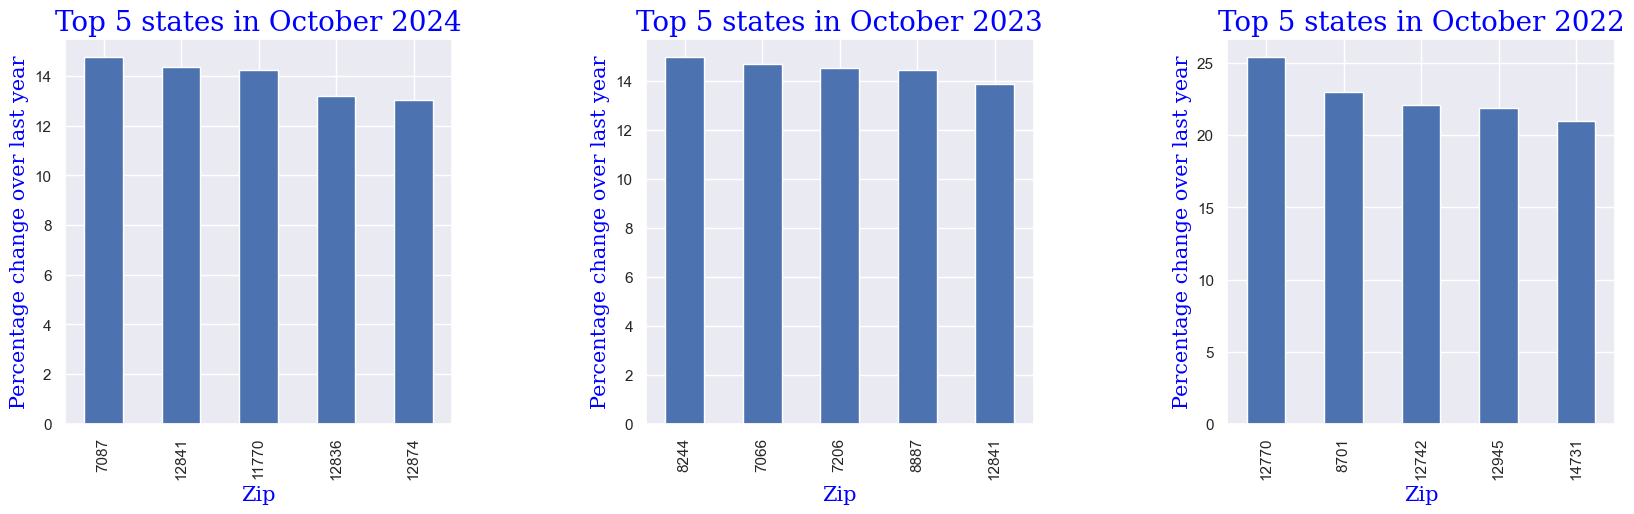

In [68]:
#setting common config for plots
font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'blue','size':15}
font_others = {'family':'serif','color':'darkred','size':10}

zip_df_change_by_year= zip_df.pct_change(periods=1)*100
# Select the latest month for trend analysis and only considering top 5
row_to_plot_2024 = zip_df_change_by_year.loc['2024-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2023 = zip_df_change_by_year.loc['2023-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2022 = zip_df_change_by_year.loc['2022-10-31'].sort_values(ascending=False)[:5] 

top5_zip_2024_index=row_to_plot_2024.index
top5_zip_2023_index=row_to_plot_2023.index
top5_zip_2022_index=row_to_plot_2022.index
top_zip_3years_index=top5_zip_2024_index.append(top5_zip_2023_index).append(top5_zip_2022_index).unique()
# we will use these index further to plot various relationships

plt.figure(figsize=(20, 5))

# Customize the plot
plt.subplot(1,3,1)
row_to_plot_2024.plot(kind='bar')
plt.title('Top 5 states in October 2024', fontdict=font_title)
plt.xlabel('Zip', fontdict=font_axis)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplot(1,3,2)
row_to_plot_2023.plot(kind='bar')
plt.title('Top 5 states in October 2023', fontdict=font_title)
plt.xlabel('Zip', fontdict=font_axis)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplot(1,3,3)
row_to_plot_2022.plot(kind='bar')
plt.title('Top 5 states in October 2022', fontdict=font_title)
plt.xlabel('Zip', fontdict=font_axis)
plt.ylabel('Percentage change over last year', fontdict=font_axis)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Slicing our dataset to understand growth trends for last 3 years 

In [70]:
zip_df_change_by_year_Last3Years=zip_df_change_by_year[top_zip_3years_index]['2022-10-31':]

<Axes: title={'center': 'Violin Plot for zips showing most promise in last 3 years'}, xlabel='Percentage increase last year', ylabel='Zip'>

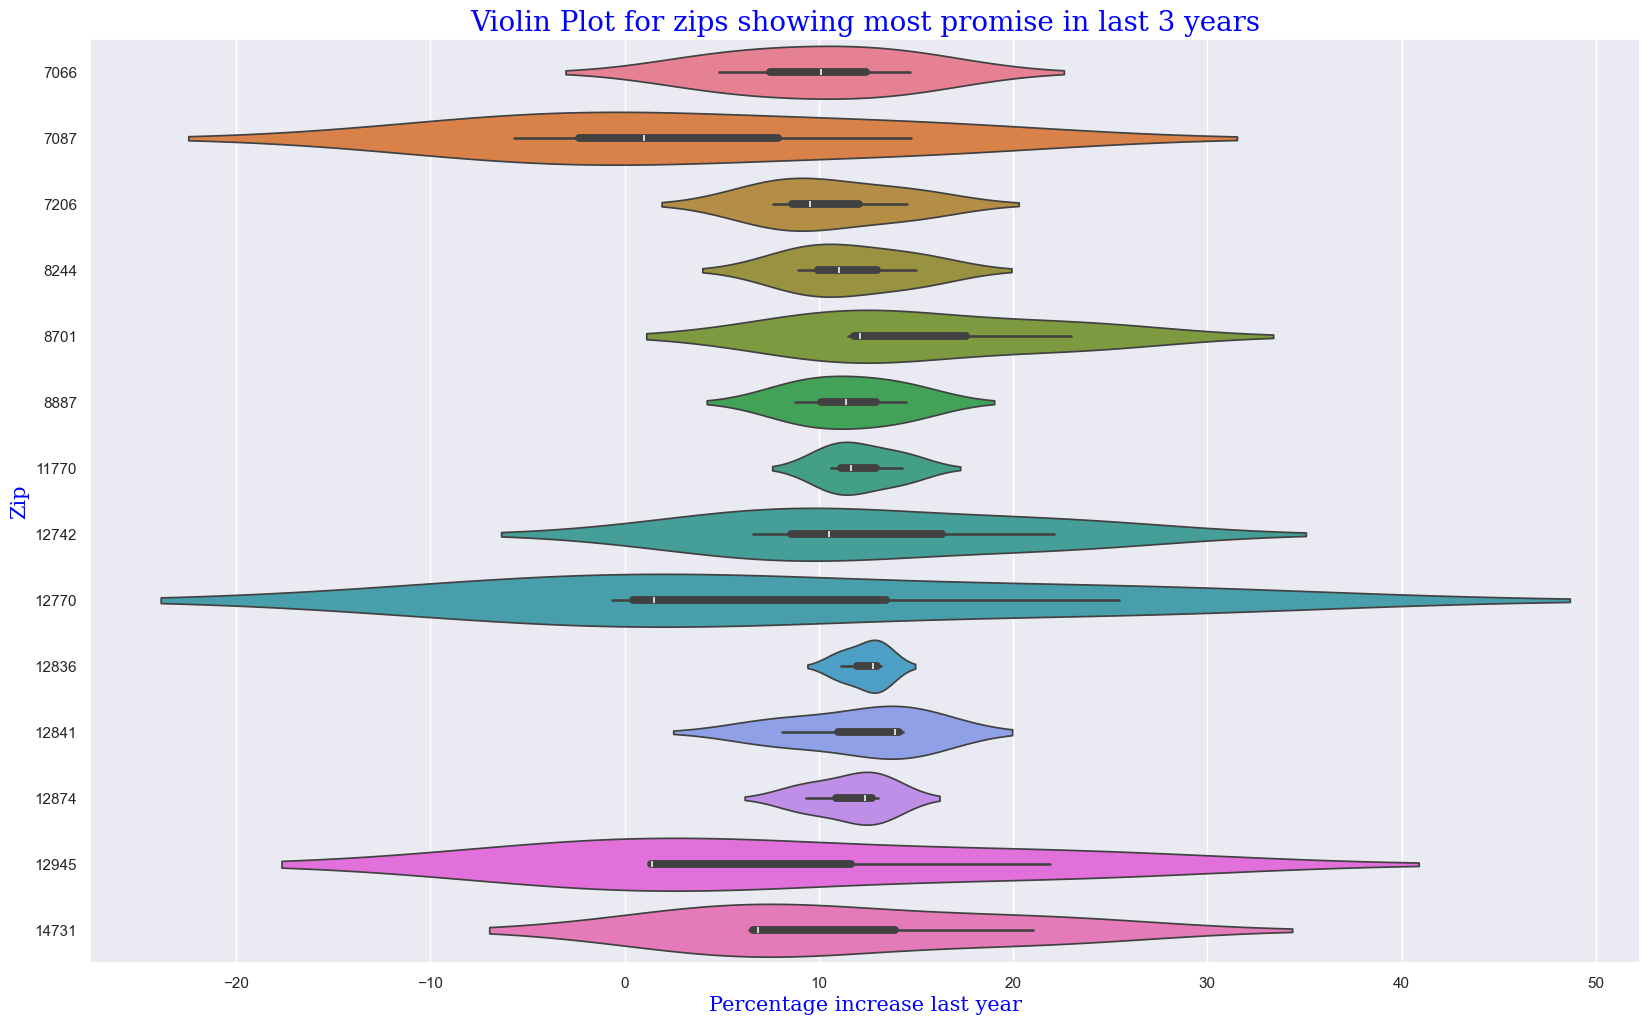

In [71]:
plt.figure(figsize=(20, 12))
# Customize the plot
plt.title('Violin Plot for zips showing most promise in last 3 years', fontdict=font_title)
plt.xlabel('Percentage increase last year', fontdict=font_axis)
plt.ylabel('Zip', fontdict=font_axis)
sns.violinplot(zip_df_change_by_year_Last3Years,orient="h")

> Observation: Eventhough there zips showing high percentage growth in the last few years some of them have very high variance.
>>To be more conservative in our investment profile, we would coinsider only states having percentage high growth but low variance in growth.
>> `12836,12874,12841` have the least variance in terms of percentage change
>> Checking again against each other since 2020

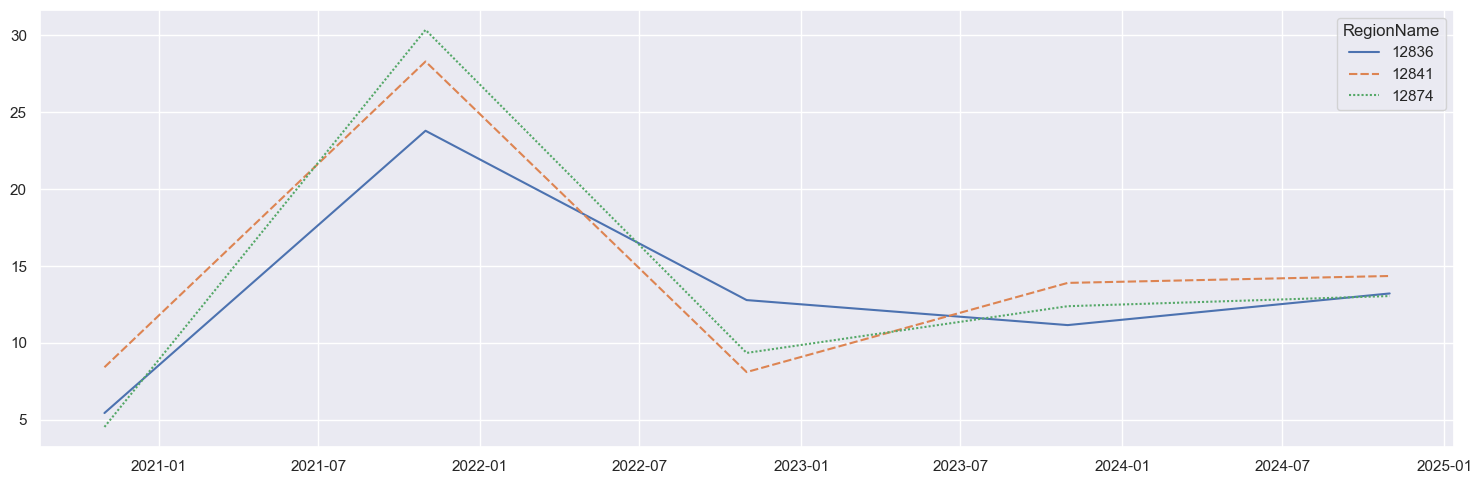

In [73]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
sns.lineplot(zip_df_change_by_year[[12841,12836,12874]]['2020-10-31':])
plt.grid(True)
plt.tight_layout()

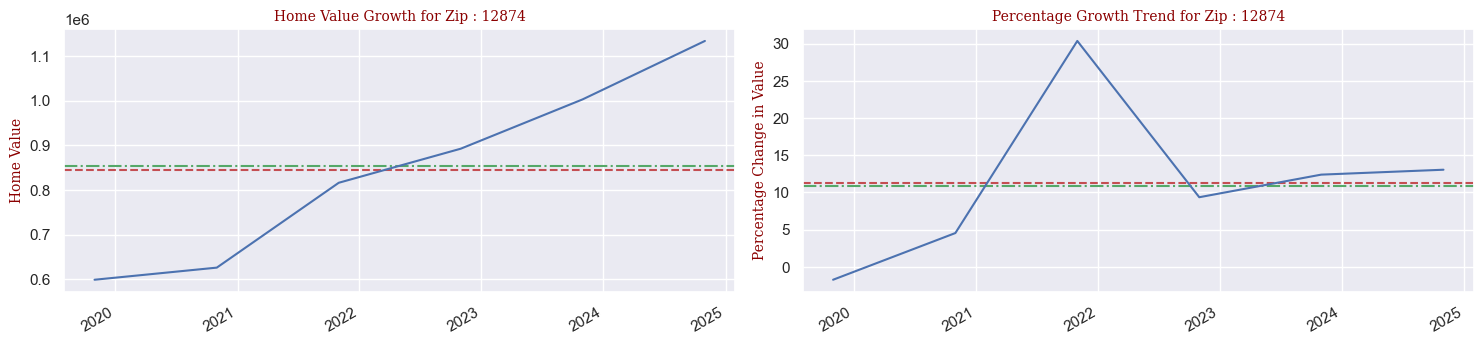

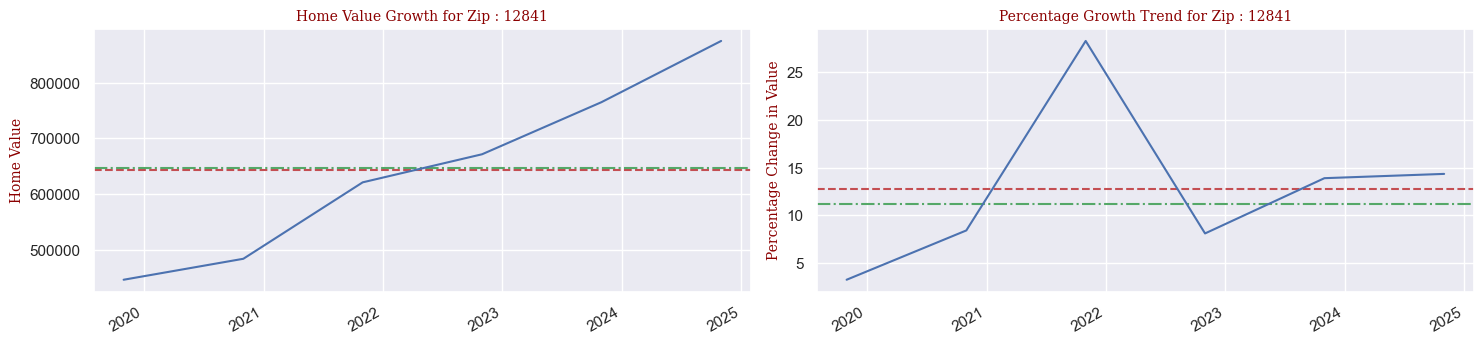

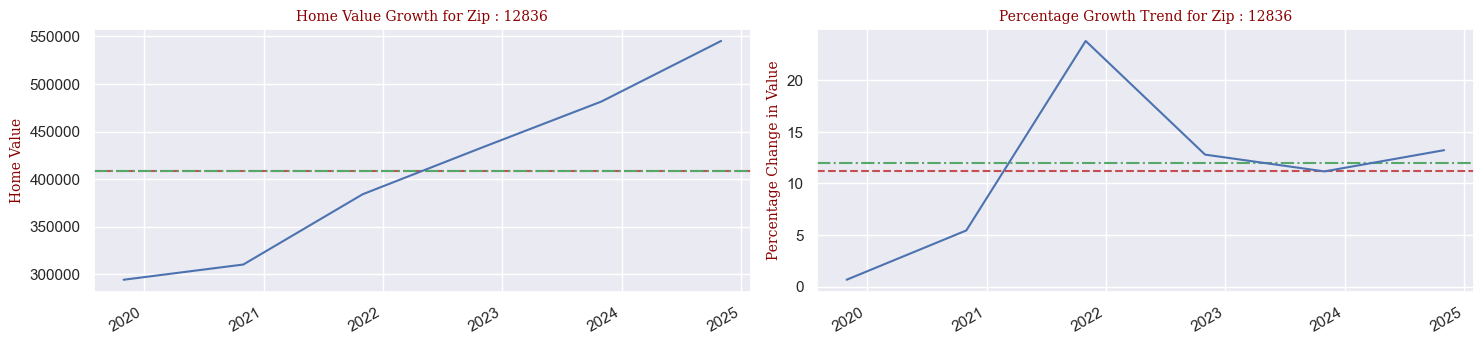

In [74]:
zip_12874_value_df=zip_df[12874]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.axhline(y=zip_12874_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12874_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Home Value Growth for Zip : 12874",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
zip_12874_value_df.plot(kind="line")
plt.tight_layout()
zip_12874_pctg_df=zip_df_change_by_year[12874]['2019-10-31':]
plt.subplot(4,2,2)
plt.axhline(y=zip_12874_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12874_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Percentage Growth Trend for Zip : 12874",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
zip_12874_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)


zip_12841_value_df=zip_df[12841]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.axhline(y=zip_12841_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12841_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Home Value Growth for Zip : 12841",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
zip_12841_value_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()
zip_12841_pctg_df=zip_df_change_by_year[12841]['2019-10-31':]
plt.subplot(4,2,2)
plt.axhline(y=zip_12841_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12841_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Percentage Growth Trend for Zip : 12841",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
zip_12841_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)


zip_12836_value_df=zip_df[12836]['2019-10-31':]
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.axhline(y=zip_12836_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12836_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Home Value Growth for Zip : 12836",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_others)
zip_12836_value_df.plot(kind="line")
plt.tight_layout()
zip_12836_pctg_df=zip_df_change_by_year[12836]['2019-10-31':]
plt.subplot(4,2,2)
plt.axhline(y=zip_12836_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=zip_12836_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Percentage Growth Trend for Zip : 12836",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_others)
zip_12836_pctg_df.plot(kind="line")
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

In [75]:
zip_df_original.loc[zip_df_original.RegionName.isin([12841,12836,12874])]

RegionID  SizeRank  RegionName RegionType StateName State  \
23981     62781     25879       12836        zip        NY    NY   
25304     62785     28586       12841        zip        NY    NY   
25308     62815     28599       12874        zip        NY    NY   

                  City            Metro         CountyName  2000-01-31  \
23981            Hague  Glens Falls, NY      Warren County         NaN   
25304  Huletts Landing  Glens Falls, NY  Washington County         NaN   
25308       Silver Bay  Glens Falls, NY      Warren County         NaN   

       2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  2000-07-31  \
23981   142157.91   142833.32   142741.31   142586.75   141779.56   141753.21   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308         NaN         NaN         NaN         NaN         NaN         NaN   

       2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  2001-01-31  \
23981   142829.00   144908.22   147048.80   149972.34   152535.32   154441.18   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308         NaN         NaN   216377.71   217836.37   218258.52   220079.24   

       2001-02-28  2001-03-31  2001-04-30  2001-05-31  2001-06-30  2001-07-31  \
23981   155178.79   155811.05   156616.78   156557.74   155385.56   154212.70   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   221531.23   223550.51   225106.28   226627.06   228373.06   230208.50   

       2001-08-31  2001-09-30  2001-10-31  2001-11-30  2001-12-31  2002-01-31  \
23981   154160.57   155886.11   158313.81   161194.10   164233.83   166141.31   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   232454.07   234654.92   237625.61   239924.98   242790.72   244999.69   

       2002-02-28  2002-03-31  2002-04-30  2002-05-31  2002-06-30  2002-07-31  \
23981   167382.06   167336.33   168012.11   168129.86   168232.37   168502.91   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   247460.09   249090.41   250709.72   252307.85   254399.46   256965.44   

       2002-08-31  2002-09-30  2002-10-31  2002-11-30  2002-12-31  2003-01-31  \
23981   169441.77   171159.66   173003.40   175083.95   177287.80   178521.22   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   259716.53   263271.16   266385.28   269609.67   272122.70   274562.13   

       2003-02-28  2003-03-31  2003-04-30  2003-05-31  2003-06-30  2003-07-31  \
23981   177353.08   175657.01   175102.69   176057.53   175060.29   172861.09   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   275658.75   277241.15   280349.31   284256.29   287260.29   287816.57   

       2003-08-31  2003-09-30  2003-10-31  2003-11-30  2003-12-31  2004-01-31  \
23981   171304.57   172293.00   175506.77   177384.63   180209.62   182277.22   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   290617.18   293989.68   301712.61   307651.68   313404.69   316606.02   

       2004-02-29  2004-03-31  2004-04-30  2004-05-31  2004-06-30  2004-07-31  \
23981   183857.42   183774.45   182917.89   183426.73   185625.15   187981.01   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   312411.34   306894.06   300188.81   300399.46   305399.62   310636.09   

       2004-08-31  2004-09-30  2004-10-31  2004-11-30  2004-12-31  2005-01-31  \
23981   191916.66   194054.96   197103.08   198870.81   202694.44   205476.17   
25304         NaN         NaN         NaN         NaN         NaN         NaN   
25308   317428.81   320021.15   324170.29   326629.93   331284.73   335164.13   

       2005-02-28  2005-03-31  2005-04-30  2005-05-31  2005-06-30  2005-07-31  \
23981   208954.28   210188.52   211896.01   213017.30   214511.45   215999.09   
25304         NaN        

# Looking at the above Data we see the most growth in state of New York

- ### Metro area: Glens Falls, NY